In [70]:
# pip install seaborn

In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## import first Dataset

In [72]:
dataset1=pd.read_csv(r'./involved_persons.csv',)
dataset1

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3895139946.py:1: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



,collision_no,rec_id,accdate,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,pedestrian_condition,pedestrian_collision_type,posted_speed,vehicle_class
0,1406457,7374272,1/23/2012 0:00,NaN,NaN,NaN,NONE,70.0,DRIVER,TURNING LEFT,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
1,1406457,7374273,1/23/2012 0:00,NaN,NaN,NaN,NaN,NaN,VEHICLE OWNER,NaN,NaN,NaN,NaN,NaN,OTHER
2,1406457,7374274,1/23/2012 0:00,NaN,NaN,NaN,NONE,58.0,DRIVER,GOING AHEAD,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
3,1406458,7527199,1/1/2012 0:00,NaN,NaN,NaN,NONE,37.0,DRIVER,STOPPED,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
4,1406458,7527200,1/1/2012 0:00,NaN,NaN,NaN,NONE,NaN,DRIVER,UNKNOWN,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046692,1910524,81650760,12/18/2021 0:00,0.0,INATTENTIVE,THRU LANE,NONE,28.0,DRIVER,TURNING LEFT,NaN,NaN,NaN,50.0,"AUTOMOBILE, STATION WAGON"
1046693,1910524,81650761,12/18/2021 0:00,0.0,NORMAL,THRU LANE,NONE,46.0,DRIVER,GOING AHEAD,NaN,NaN,NaN,50.0,"AUTOMOBILE, STATION WAGON"
1046694,1910524,81650762,12/18/2021 0:00,NaN,NaN,THRU LANE,MINOR,51.0,PASSENGER,NaN,NaN,NaN,NaN,NaN,NaN
1046695,1910525,81631253,12/31/2021 0:00,60.0,INATTENTIVE,THRU LANE,NONE,23.0,DRIVER,GOING AHEAD,NaN,NaN,NaN,90.0,"AUTOMOBILE, STATION WAGON"


In [73]:
dataset1['collision_no'].value_counts()

collision_no
1437339    41
1563266    30
1857213    24
1527548    23
1775936    20
           ..
1760721     1
1760722     1
1760723     1
1562318     1
1658491     1
Name: count, Length: 504069, dtype: int64

In [74]:
dataset1['collision_no'].nunique()

504069

In [75]:
dataset1=dataset1.set_index('collision_no',drop=True)

In [76]:
dataset1.head(15)

,rec_id,accdate,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,pedestrian_condition,pedestrian_collision_type,posted_speed,vehicle_class
collision_no,,,,,,,,,,,,,,
1406457,7374272,1/23/2012 0:00,NaN,NaN,NaN,NONE,70.0,DRIVER,TURNING LEFT,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
1406457,7374273,1/23/2012 0:00,NaN,NaN,NaN,NaN,NaN,VEHICLE OWNER,NaN,NaN,NaN,NaN,NaN,OTHER
1406457,7374274,1/23/2012 0:00,NaN,NaN,NaN,NONE,58.0,DRIVER,GOING AHEAD,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
1406458,7527199,1/1/2012 0:00,NaN,NaN,NaN,NONE,37.0,DRIVER,STOPPED,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
1406458,7527200,1/1/2012 0:00,NaN,NaN,NaN,NONE,NaN,DRIVER,UNKNOWN,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
1406459,7374277,1/1/2012 0:00,NaN,NaN,NaN,NONE,NaN,VEHICLE OWNER,UNKNOWN,NaN,NaN,NaN,NaN,OTHER
1406459,7374278,1/1/2012 0:00,NaN,NaN,NaN,NONE,51.0,DRIVER,STOPPED,NaN,NaN,NaN,NaN,OTHER
1406459,7374279,1/1/2012 0:00,NaN,NaN,NaN,NONE,32.0,DRIVER,GOING AHEAD,NaN,NaN,NaN,NaN,"AUTOMOBILE, STATION WAGON"
1406460,7374280,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,VEHICLE OWNER,NaN,NaN,NaN,NaN,NaN,OTHER


## imoprt second Dataset

In [77]:
dataset2=pd.read_csv(r'./collision_events.csv',index_col='collision_no')
dataset2

,accdate,district,latitude,longitude,impact_type,light,location_class,road_surface_cond,road_class,traffic_control,visibility
collision_no,,,,,,,,,,,
1406457,1/23/2012,Etobicoke York,43.640845,-79.508792,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Minor Arterial,STOP SIGN,RAIN
1406458,1/1/2012,Etobicoke York,43.747745,-79.562390,REAR END,DAYLIGHT,INTERSECTION,WET,Major Arterial,TRAFFIC SIGNAL,RAIN
1406459,1/1/2012,North York,43.767945,-79.319590,REAR END,DARK,NaN,DRY,Major Arterial,NO CONTROL,CLEAR
1406460,1/1/2012,North York,43.697581,-79.440929,REAR END,DARK,MID-BLOCK,DRY,Major Arterial,NO CONTROL,CLEAR
1406461,1/1/2012,Toronto and East York,43.654545,-79.369490,TURNING MOVEMENT,DARK,INTERSECTION,DRY,Major Arterial,TRAFFIC SIGNAL,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...
1910521,6/29/2021,Toronto and East York,43.638446,-79.392200,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Major Arterial,TRAFFIC SIGNAL,RAIN
1910522,7/29/2021,NaN,43.636779,-79.539509,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,DRY,NaN,NO CONTROL,CLEAR
1910523,12/31/2021,NaN,43.669761,-79.362255,SMV OTHER,"DARK, ARTIFICIAL",MID-BLOCK,PACKED SNOW,NaN,NO CONTROL,SNOW


### Combine two Datasets 

In [78]:
dataset=dataset1.join(dataset2,how='inner',lsuffix='L')


In [79]:
dataset

,rec_id,accdateL,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,...,district,latitude,longitude,impact_type,light,location_class,road_surface_cond,road_class,traffic_control,visibility
collision_no,,,,,,,,,,,,,,,,,,,,,
1406457,7374272,1/23/2012 0:00,NaN,NaN,NaN,NONE,70.0,DRIVER,TURNING LEFT,NaN,...,Etobicoke York,43.640845,-79.508792,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Minor Arterial,STOP SIGN,RAIN
1406457,7374273,1/23/2012 0:00,NaN,NaN,NaN,NaN,NaN,VEHICLE OWNER,NaN,NaN,...,Etobicoke York,43.640845,-79.508792,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Minor Arterial,STOP SIGN,RAIN
1406457,7374274,1/23/2012 0:00,NaN,NaN,NaN,NONE,58.0,DRIVER,GOING AHEAD,NaN,...,Etobicoke York,43.640845,-79.508792,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Minor Arterial,STOP SIGN,RAIN
1406458,7527199,1/1/2012 0:00,NaN,NaN,NaN,NONE,37.0,DRIVER,STOPPED,NaN,...,Etobicoke York,43.747745,-79.562390,REAR END,DAYLIGHT,INTERSECTION,WET,Major Arterial,TRAFFIC SIGNAL,RAIN
1406458,7527200,1/1/2012 0:00,NaN,NaN,NaN,NONE,NaN,DRIVER,UNKNOWN,NaN,...,Etobicoke York,43.747745,-79.562390,REAR END,DAYLIGHT,INTERSECTION,WET,Major Arterial,TRAFFIC SIGNAL,RAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910524,81650760,12/18/2021 0:00,0.0,INATTENTIVE,THRU LANE,NONE,28.0,DRIVER,TURNING LEFT,NaN,...,NaN,43.792323,-79.246197,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,LOOSE SNOW,NaN,NO CONTROL,SNOW
1910524,81650761,12/18/2021 0:00,0.0,NORMAL,THRU LANE,NONE,46.0,DRIVER,GOING AHEAD,NaN,...,NaN,43.792323,-79.246197,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,LOOSE SNOW,NaN,NO CONTROL,SNOW
1910524,81650762,12/18/2021 0:00,NaN,NaN,THRU LANE,MINOR,51.0,PASSENGER,NaN,NaN,...,NaN,43.792323,-79.246197,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,LOOSE SNOW,NaN,NO CONTROL,SNOW


In [80]:
dataset['rec_id'].nunique()

1046697

In [81]:
dataset.tail(10)

,rec_id,accdateL,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,...,district,latitude,longitude,impact_type,light,location_class,road_surface_cond,road_class,traffic_control,visibility
collision_no,,,,,,,,,,,,,,,,,,,,,
1910521,81578670,6/29/2021 0:00,40.0,FATIGUE,WITHIN INTERSECTION,NONE,28.0,DRIVER,TURNING LEFT,NaN,...,Toronto and East York,43.638446,-79.392200,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Major Arterial,TRAFFIC SIGNAL,RAIN
1910521,81578671,6/29/2021 0:00,15.0,NORMAL,WITHIN INTERSECTION,NONE,23.0,DRIVER,TURNING LEFT,NaN,...,Toronto and East York,43.638446,-79.392200,TURNING MOVEMENT,DAYLIGHT,INTERSECTION,WET,Major Arterial,TRAFFIC SIGNAL,RAIN
1910522,81581472,7/29/2021 0:00,30.0,INATTENTIVE,THRU LANE,NONE,82.0,DRIVER,TURNING LEFT,NaN,...,NaN,43.636779,-79.539509,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,DRY,NaN,NO CONTROL,CLEAR
1910522,81581473,7/29/2021 0:00,50.0,NORMAL,THRU LANE,MINOR,69.0,DRIVER,GOING AHEAD,NaN,...,NaN,43.636779,-79.539509,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,DRY,NaN,NO CONTROL,CLEAR
1910523,81615956,12/31/2021 0:00,15.0,UNKNOWN,THRU LANE,NONE,NaN,DRIVER,UNKNOWN,NaN,...,NaN,43.669761,-79.362255,SMV OTHER,"DARK, ARTIFICIAL",MID-BLOCK,PACKED SNOW,NaN,NO CONTROL,SNOW
1910524,81650760,12/18/2021 0:00,0.0,INATTENTIVE,THRU LANE,NONE,28.0,DRIVER,TURNING LEFT,NaN,...,NaN,43.792323,-79.246197,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,LOOSE SNOW,NaN,NO CONTROL,SNOW
1910524,81650761,12/18/2021 0:00,0.0,NORMAL,THRU LANE,NONE,46.0,DRIVER,GOING AHEAD,NaN,...,NaN,43.792323,-79.246197,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,LOOSE SNOW,NaN,NO CONTROL,SNOW
1910524,81650762,12/18/2021 0:00,NaN,NaN,THRU LANE,MINOR,51.0,PASSENGER,NaN,NaN,...,NaN,43.792323,-79.246197,TURNING MOVEMENT,DAYLIGHT,MID-BLOCK,LOOSE SNOW,NaN,NO CONTROL,SNOW
1910525,81631253,12/31/2021 0:00,60.0,INATTENTIVE,THRU LANE,NONE,23.0,DRIVER,GOING AHEAD,NaN,...,NaN,43.641166,-79.381626,REAR END,"DARK, ARTIFICIAL",MID-BLOCK,DRY,NaN,NO CONTROL,CLEAR


### Filter Padestrains from Dataset

In [82]:
dataset['involved_class'].value_counts()

involved_class
DRIVER                  800576
PASSENGER               114053
VEHICLE OWNER            48841
TRUCK DRIVER             22217
OTHER                    19756
PEDESTRIAN               16045
CYCLIST                   9830
MOTORCYCLE DRIVER         3683
OTHER PROPERTY OWNER      2773
MOTORCYCLE PASSENGER       529
DRIVER - NOT HIT           279
MOPED DRIVER               193
WITNESS                     91
WHEELCHAIR                  86
CYCLIST PASSENGER           61
TRAILER OWNER               49
ANIMAL                      13
PEDESTRIAN - NOT HIT        11
MOPED PASSENGER             10
IN-LINE SKATER               7
UNKNOWN - FTR                4
CYCLIST - NOT HIT            3
COMPANY                      1
Name: count, dtype: int64

In [83]:
dataset=dataset[(dataset['involved_class']=='PEDESTRIAN') |  (dataset['involved_class']=='PEDESTRIAN - NOT HIT')]

In [84]:
dataset['involved_class'].value_counts()

involved_class
PEDESTRIAN              16045
PEDESTRIAN - NOT HIT       11
Name: count, dtype: int64

### Data Information

In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16056 entries, 1406823 to 1910515
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rec_id                     16056 non-null  int64  
 1   accdateL                   16056 non-null  object 
 2   actual_speed               1217 non-null   float64
 3   driver_condition           175 non-null    object 
 4   impact_location            11860 non-null  object 
 5   involved_injury_class      16050 non-null  object 
 6   involved_age               15666 non-null  float64
 7   involved_class             16056 non-null  object 
 8   manoeuver                  540 non-null    object 
 9   pedestrian_action          14926 non-null  object 
 10  pedestrian_condition       15883 non-null  object 
 11  pedestrian_collision_type  14597 non-null  object 
 12  posted_speed               1937 non-null   float64
 13  vehicle_class              3678 non-null   

In [86]:
dataset.nunique()

rec_id                       16056
accdateL                      3446
actual_speed                    36
driver_condition                 3
impact_location                 13
involved_injury_class            5
involved_age                   100
involved_class                   2
manoeuver                       12
pedestrian_action               15
pedestrian_condition            10
pedestrian_collision_type       16
posted_speed                    12
vehicle_class                   17
accdate                       3446
district                         5
latitude                     10209
longitude                    10384
impact_type                      9
light                            9
location_class                   4
road_surface_cond                9
road_class                      11
traffic_control                 12
visibility                       8
dtype: int64

In [87]:
dataset=dataset.drop(['rec_id','accdateL'],axis=1)

In [88]:
dataset.describe(include="all")

,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,pedestrian_condition,pedestrian_collision_type,...,district,latitude,longitude,impact_type,light,location_class,road_surface_cond,road_class,traffic_control,visibility
count,1217.000000,175,11860,16050,15666.000000,16056,540,14926,15883,14597,...,14799,16056.000000,16056.000000,16056,16054,15841,16044,15670,16042,16043
unique,NaN,3,13,5,NaN,2,12,15,10,16,...,5,NaN,NaN,9,9,4,9,11,12,8
top,NaN,"ABILITY IMPAIRED, ALCOHOL",WITHIN INTERSECTION,MINOR,NaN,PEDESTRIAN,GOING AHEAD,CROSSING WITH RIGHT OF WAY,NORMAL,VEHICLE TURNS LEFT WHILE PED CROSSES WITH ROW ...,...,Toronto and East York,NaN,NaN,PEDESTRIAN COLLISIONS,DAYLIGHT,INTERSECTION,DRY,Major Arterial,TRAFFIC SIGNAL,CLEAR
freq,NaN,116,6676,7860,NaN,16045,324,7652,11390,4144,...,5680,NaN,NaN,15821,9535,12417,11871,10640,8385,12985
mean,33.729663,NaN,NaN,NaN,40.215690,NaN,NaN,NaN,NaN,NaN,...,NaN,43.512383,-79.039085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,90.412169,NaN,NaN,NaN,20.612449,NaN,NaN,NaN,NaN,NaN,...,NaN,2.920955,5.305774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000045,-79.632427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10.000000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,43.659795,-79.454393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20.000000,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,43.699748,-79.396190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,40.000000,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,43.755385,-79.331195,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Missvalue

In [89]:
dataset.isna().sum()

actual_speed                 14839
driver_condition             15881
impact_location               4196
involved_injury_class            6
involved_age                   390
involved_class                   0
manoeuver                    15516
pedestrian_action             1130
pedestrian_condition           173
pedestrian_collision_type     1459
posted_speed                 14119
vehicle_class                12378
accdate                          0
district                      1257
latitude                         0
longitude                        0
impact_type                      0
light                            2
location_class                 215
road_surface_cond               12
road_class                     386
traffic_control                 14
visibility                      13
dtype: int64

### remove smples they have not value at target Column


In [90]:
dataset['involved_injury_class'].replace([np.nan], '?', inplace=True)

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\499354142.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [91]:
dataset=dataset[dataset['involved_injury_class']!='?']
dataset

,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,pedestrian_condition,pedestrian_collision_type,...,district,latitude,longitude,impact_type,light,location_class,road_surface_cond,road_class,traffic_control,visibility
collision_no,,,,,,,,,,,,,,,,,,,,,
1406823,NaN,NaN,NaN,MINIMAL,43.0,PEDESTRIAN,NaN,CROSSING WITH RIGHT OF WAY,NORMAL,VEHICLE TURNS LEFT WHILE PED CROSSES WITH ROW ...,...,North York,43.769145,-79.376590,PEDESTRIAN COLLISIONS,DAYLIGHT,INTERSECTION,DRY,Major Arterial,TRAFFIC SIGNAL,CLEAR
1406865,NaN,NaN,NaN,MINOR,11.0,PEDESTRIAN,NaN,"CROSSING, NO TRAFFIC CONTROL",INATTENTIVE,PEDESTRIAN INVOLVED IN A COLLISION WITH TRANSI...,...,Scarborough,43.737645,-79.243690,PEDESTRIAN COLLISIONS,DAYLIGHT,INTERSECTION,DRY,Major Arterial,NO CONTROL,CLEAR
1406929,NaN,NaN,NaN,MAJOR,66.0,PEDESTRIAN,NaN,"CROSSING, NO TRAFFIC CONTROL",INATTENTIVE,PEDESTRIAN HIT AT MID-BLOCK,...,North York,43.728445,-79.418090,PEDESTRIAN COLLISIONS,DAYLIGHT,MID-BLOCK,DRY,Major Arterial,NO CONTROL,CLEAR
1406992,NaN,NaN,NaN,MINIMAL,52.0,PEDESTRIAN,NaN,"CROSSING, NO TRAFFIC CONTROL",UNKNOWN,VEHICLE IS GOING STRAIGHT THRU INTER.WHILE PED...,...,Toronto and East York,43.675045,-79.320190,PEDESTRIAN COLLISIONS,"DARK, ARTIFICIAL",INTERSECTION,WET,Minor Arterial,NO CONTROL,RAIN
1407011,NaN,NaN,NaN,MAJOR,19.0,PEDESTRIAN,NaN,RUNNING ONTO ROADWAY,INATTENTIVE,PEDESTRIAN INVOLVED IN A COLLISION WITH TRANSI...,...,Toronto and East York,43.687645,-79.396390,PEDESTRIAN COLLISIONS,DAYLIGHT,MID-BLOCK,DRY,Major Arterial,NO CONTROL,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910494,NaN,NaN,THRU LANE,MINOR,51.0,PEDESTRIAN,NaN,OTHER,OTHER,NaN,...,NaN,43.638835,-79.445598,PEDESTRIAN COLLISIONS,DAYLIGHT,MID-BLOCK,WET,NaN,NO CONTROL,CLEAR
1910497,NaN,NaN,WITHIN INTERSECTION,MINOR,27.0,PEDESTRIAN,NaN,NaN,NORMAL,NaN,...,North York,43.733375,-79.452839,PEDESTRIAN COLLISIONS,"DARK, ARTIFICIAL",INTERSECTION,DRY,Major Arterial,TRAFFIC SIGNAL,CLEAR
1910502,NaN,NaN,WITHIN INTERSECTION,MINOR,41.0,PEDESTRIAN,NaN,NaN,NORMAL,NaN,...,NaN,0.000045,0.000210,PEDESTRIAN COLLISIONS,"DARK, ARTIFICIAL",INTERSECTION,DRY,NaN,TRAFFIC SIGNAL,CLEAR


In [92]:
dataset['district'].value_counts()

district
Toronto and East York    5679
North York               3310
Etobicoke York           2922
Scarborough              2881
Toronto East York           1
Name: count, dtype: int64

### Split 'involved_injury_class' into  'unserious injury' and 'serious injury'

In [93]:
dataset['involved_injury_class'].value_counts()

involved_injury_class
MINOR      7860
MINIMAL    5613
MAJOR      1327
NONE        911
FATAL       339
Name: count, dtype: int64

In [94]:
dataset['involved_injury_class'].replace(['NONE','MINIMAL','MINOR'], 0, inplace=True)
dataset['involved_injury_class'].replace(['MAJOR','FATAL'], 1, inplace=True)

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\2943142591.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\2943142591.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [95]:
dataset['involved_injury_class'].value_counts()

involved_injury_class
0    14384
1     1666
Name: count, dtype: int64

### Exploratory Data Analysis

#### Data Balancing

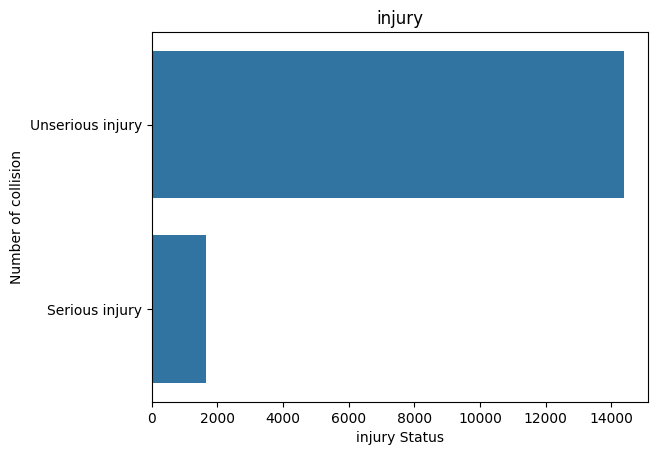

involved_injury_class
Unserious injury    14384
Serious injury       1666
Name: count, dtype: int64

In [96]:
trgt = dataset['involved_injury_class'].apply(lambda x: 'Unserious injury' if x == 0 else 'Serious injury')
sns.countplot(trgt)
plt.title('injury')
plt.xlabel('injury Status')
plt.ylabel('Number of collision')
plt.show()
trgt.value_counts()

In [97]:
df2=dataset.copy()

In [98]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'involved_injury_class':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['involved_injury_class mean'] = feature['involved_injury_class mean']*100
    feature.columns = [x, 'total collision', 'number of serious injury', 
                       '% of serious injury in the Relevant Group'] 
    feature['% of serious injury in all collision'] = (feature['number of serious injury'] / 1666)*100
        
    return feature

In [99]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'involved_injury_class':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['involved_injury_class mean'] = feature['involved_injury_class mean']*100
    feature.columns = [x, 'total collision', 'number of serious injury', 
                       '% of serious injury in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots(figsize=(9,7))
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['total collision'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of serious injury in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('serious injury compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)

    ax1.set_xticklabels(feature[x], rotation=90)

    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("total collision")
    ax2.set_ylabel("serious injury Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

#### percentage od serious injury in different Age bins

In [100]:
# Labeling age groups

bins = [0, 24, 37, 56, 99]
group_names = ['(1-24)', '(24-37)', '(37-56)', '(56-99)']
df2['involved_age'] = pd.cut(df2['involved_age'], bins, labels = group_names)

In [101]:
df2['involved_age']

collision_no
1406823    (37-56)
1406865     (1-24)
1406929    (56-99)
1406992    (37-56)
1407011     (1-24)
            ...   
1910494    (37-56)
1910497    (24-37)
1910502    (37-56)
1910505    (56-99)
1910515    (24-37)
Name: involved_age, Length: 16050, dtype: category
Categories (4, object): ['(1-24)' < '(24-37)' < '(37-56)' < '(56-99)']

In [102]:
df2['involved_age'].isna().sum()

## tahlil ba dar nazar gereftan missvalu ha anjam mishe ke vafhee bashe

397

In [103]:
table_df(x = 'involved_age')

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3995034596.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,involved_age,total collision,number of serious injury,% of serious injury in the Relevant Group,% of serious injury in all collision
0,(1-24),4237,280,6.608449,16.806723
1,(24-37),3789,316,8.339931,18.967587
2,(37-56),3855,354,9.182879,21.248499
3,(56-99),3772,702,18.610817,42.136855


C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3832998739.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



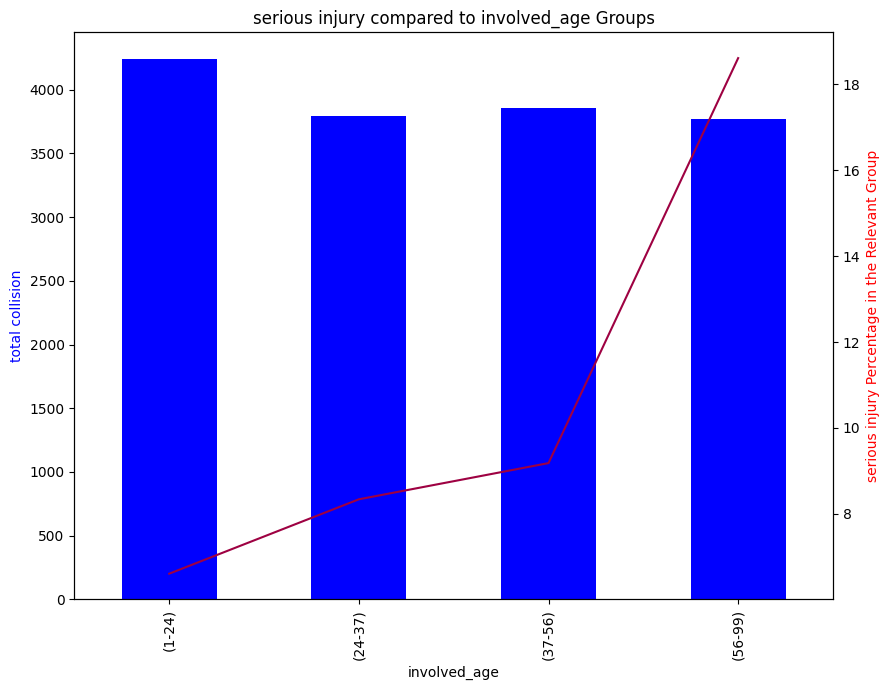

In [104]:
graph_df(x = 'involved_age')

#### speed

In [105]:

bins1 = [0, 10, 20, 40, 999]
group_names1 = ['(0-10)', '(10-20)', '(20-40)', '(40-999)']
df2['actual_speed'] = pd.cut(df2['actual_speed'], bins1, labels = group_names1)
df2['actual_speed']

collision_no
1406823    NaN
1406865    NaN
1406929    NaN
1406992    NaN
1407011    NaN
          ... 
1910494    NaN
1910497    NaN
1910502    NaN
1910505    NaN
1910515    NaN
Name: actual_speed, Length: 16050, dtype: category
Categories (4, object): ['(0-10)' < '(10-20)' < '(20-40)' < '(40-999)']

In [106]:
table_df(x = 'actual_speed')

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3995034596.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,actual_speed,total collision,number of serious injury,% of serious injury in the Relevant Group,% of serious injury in all collision
0,(0-10),283,125,44.169611,7.503001
1,(10-20),217,129,59.447005,7.743097
2,(20-40),277,194,70.036101,11.644658
3,(40-999),289,264,91.349481,15.846339


C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3832998739.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



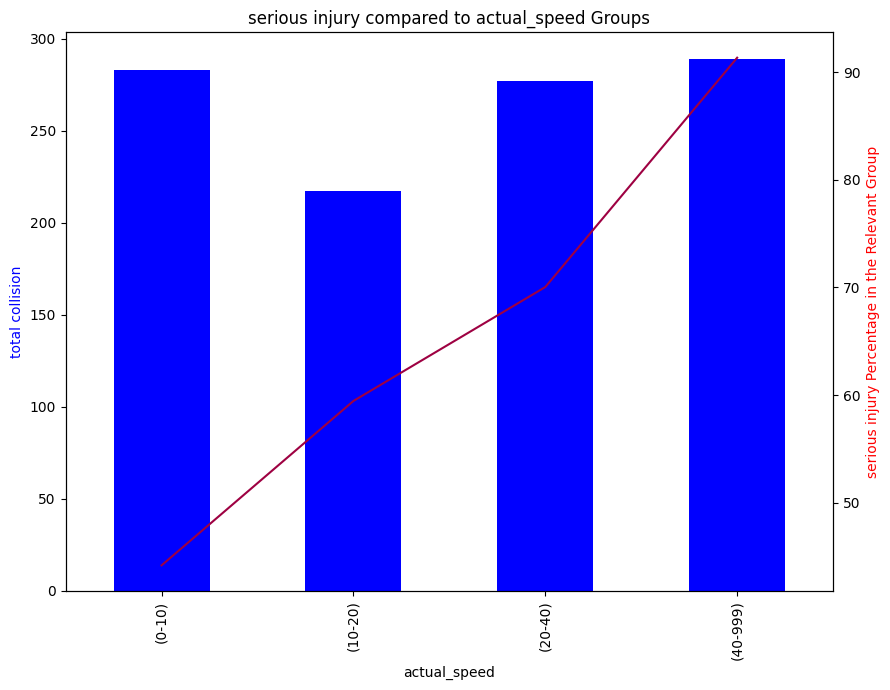

In [107]:
graph_df(x = 'actual_speed')

#### 'driver_condition' :
hich kodoom az serious injury ha ro shamel nemische kelas haye in sotoon 
por az miss value ham hast . behtare hazf she 

In [108]:
table_df(x='driver_condition')

,driver_condition,total collision,number of serious injury,% of serious injury in the Relevant Group,% of serious injury in all collision
0,"ABILITY IMPAIRED, ALCOHOL",116,0,0.0,0.0
1,NORMAL,10,0,0.0,0.0
2,UNKNOWN,49,0,0.0,0.0


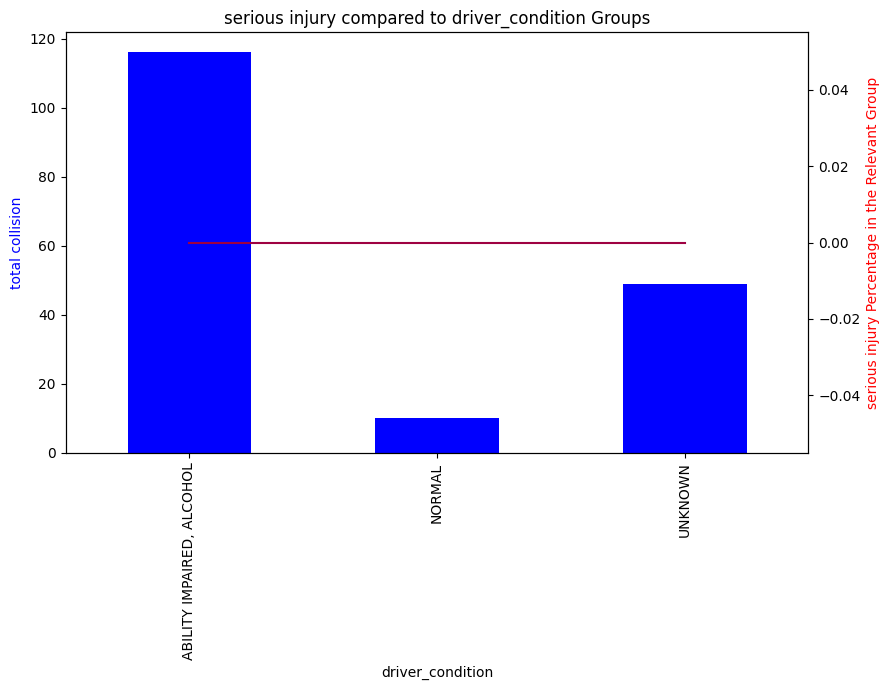

In [109]:
graph_df(x='driver_condition')

#### posted speed

In [110]:
dataset['posted_speed'].describe()

count    1936.000000
mean       49.076963
std        11.558357
min         0.000000
25%        50.000000
50%        50.000000
75%        60.000000
max        90.000000
Name: posted_speed, dtype: float64

In [111]:
bins2= [0, 50, 60, 90]
group_names2 = ['(0-50)', '(50-60)', '(60-90)']
df2['posted_speed'] = pd.cut(df2['posted_speed'], bins2, labels = group_names2)
df2['posted_speed']


collision_no
1406823    NaN
1406865    NaN
1406929    NaN
1406992    NaN
1407011    NaN
          ... 
1910494    NaN
1910497    NaN
1910502    NaN
1910505    NaN
1910515    NaN
Name: posted_speed, Length: 16050, dtype: category
Categories (3, object): ['(0-50)' < '(50-60)' < '(60-90)']

In [112]:
table_df(x='posted_speed')

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3995034596.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,posted_speed,total collision,number of serious injury,% of serious injury in the Relevant Group,% of serious injury in all collision
0,(0-50),1354,281,20.753323,16.866747
1,(50-60),515,162,31.456311,9.723890
2,(60-90),12,8,66.666667,0.480192


C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3832998739.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



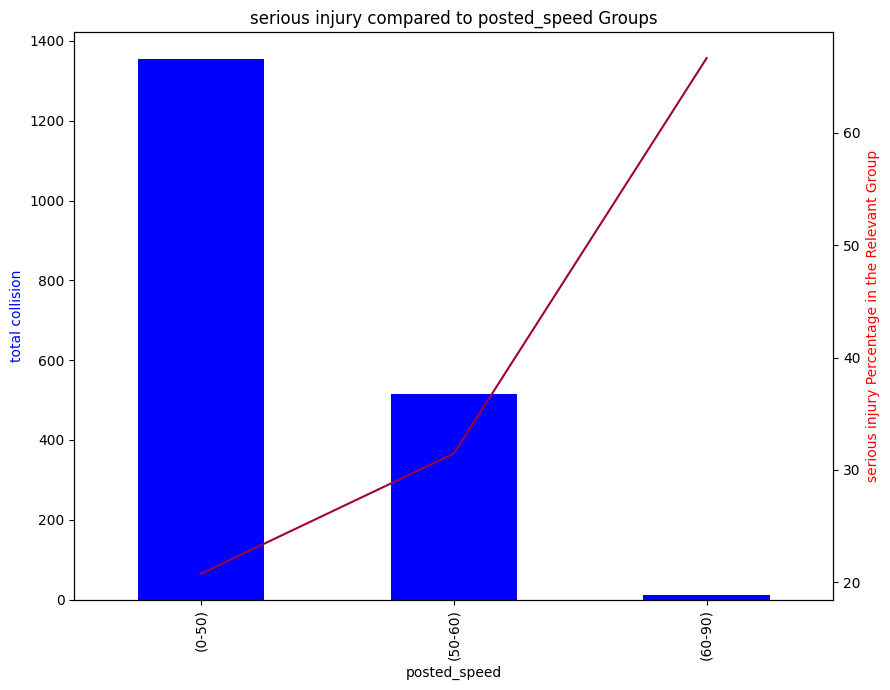

In [113]:
graph_df(x='posted_speed')

#### 'impact_location'

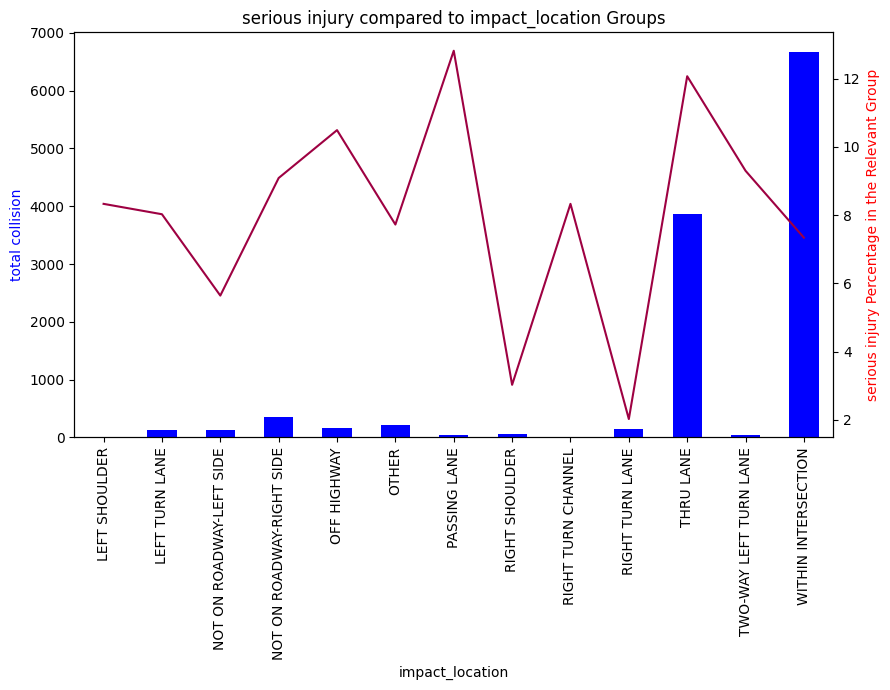

In [114]:

graph_df(x='impact_location')


#### Manoeuver

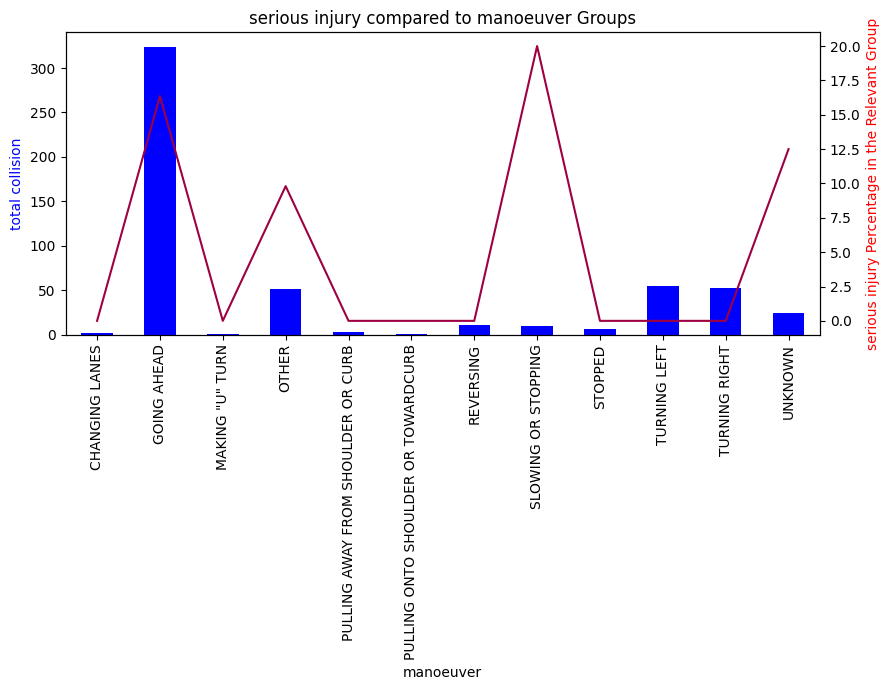

In [115]:
graph_df(x='manoeuver')

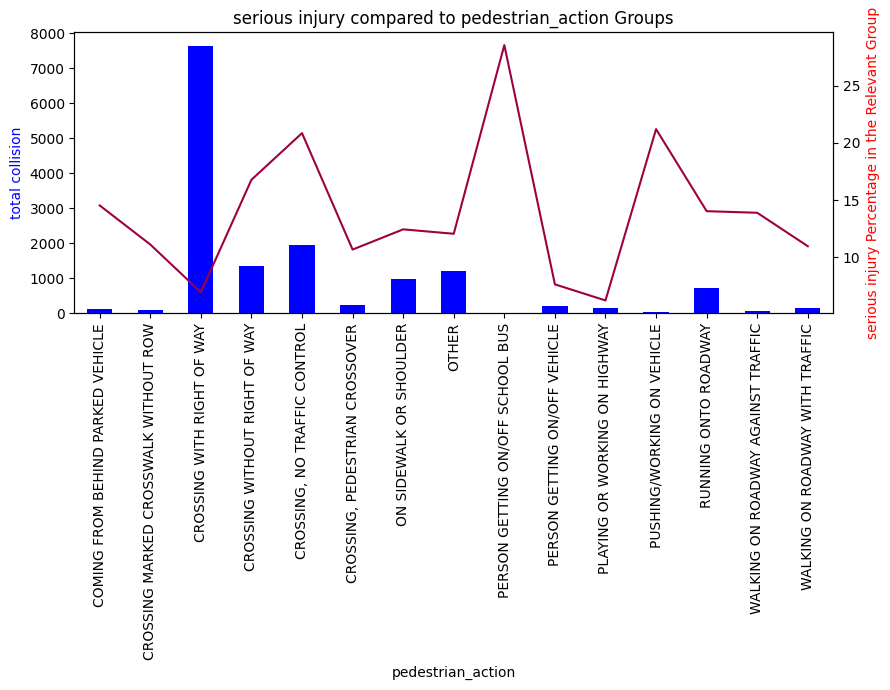

In [116]:
graph_df(x='pedestrian_action')

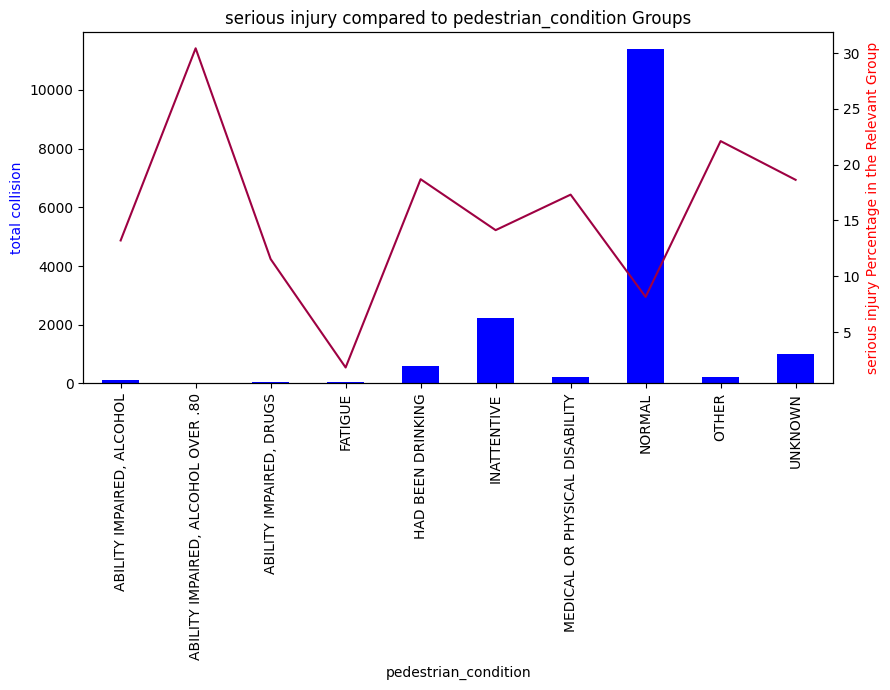

In [117]:
graph_df(x='pedestrian_condition')

C:\Users\k_nejads_adm\AppData\Local\Temp\ipykernel_20176\3832998739.py:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



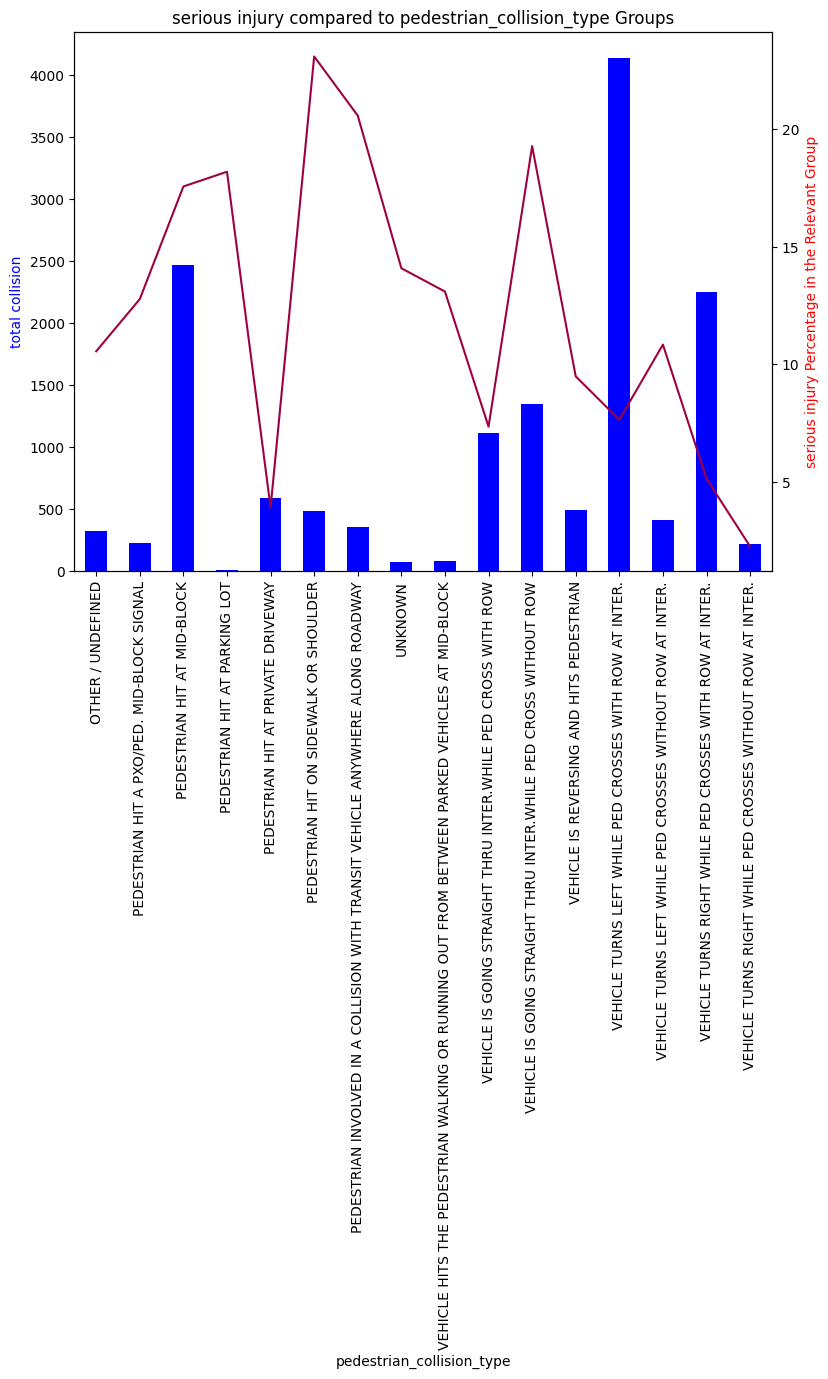

In [118]:
graph_df(x='pedestrian_collision_type')

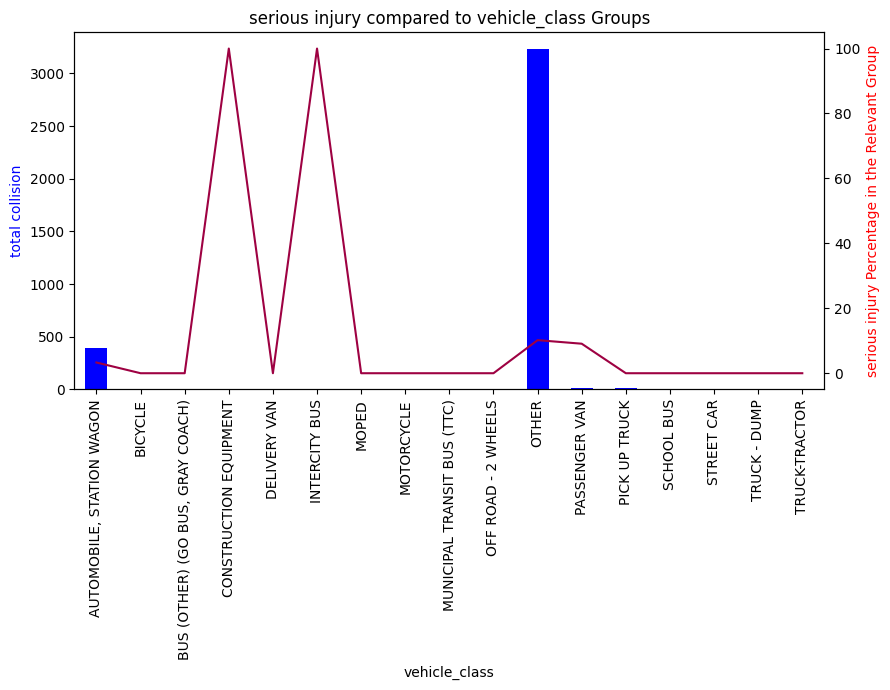

In [119]:
graph_df(x='vehicle_class')

####  Month effect  in seriuos injury

In [120]:

df2['month'] = pd.DatetimeIndex(df2['accdate']).month

In [121]:
df2[['month' , 'accdate']]

,month,accdate
collision_no,,
1406823,1,1/3/2012
1406865,1,1/9/2012
1406929,1,1/10/2012
1406992,1,1/1/2012
1407011,1,1/11/2012
...,...,...
1910494,12,12/30/2021
1910497,12,12/30/2021
1910502,12,12/31/2021


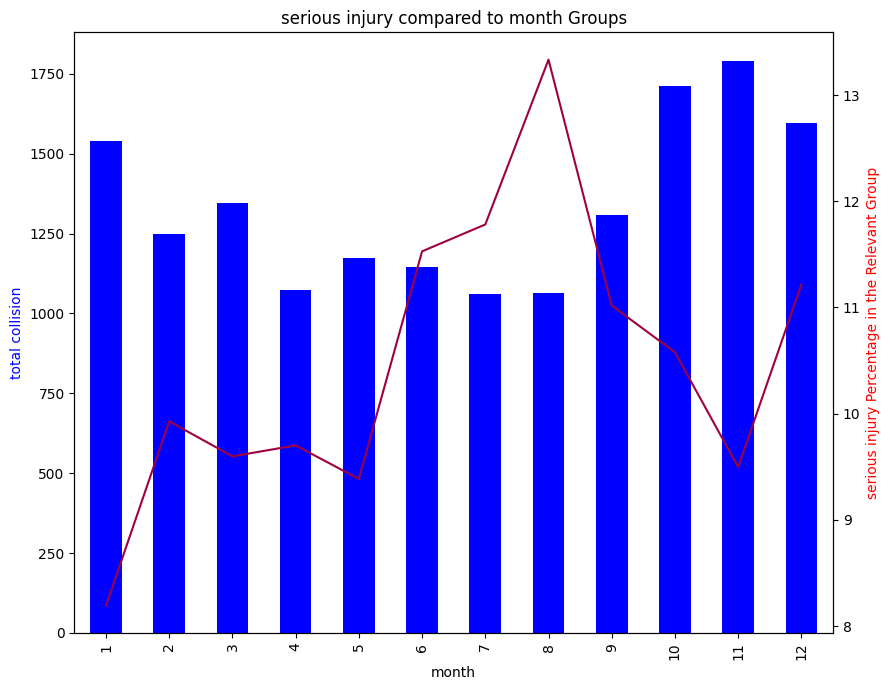

In [122]:
graph_df(x='month')

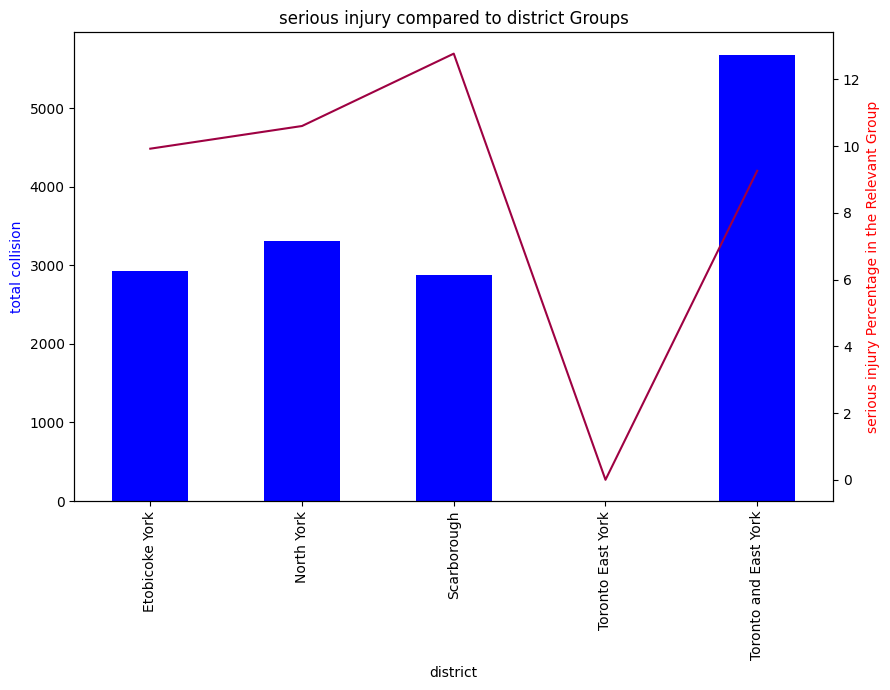

In [123]:
graph_df(x='district')

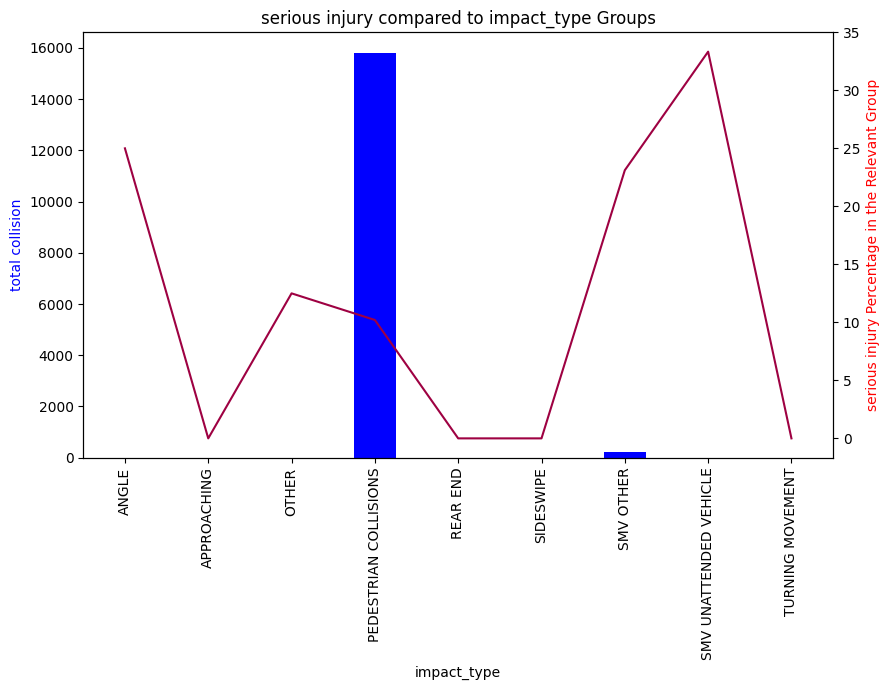

In [124]:
graph_df(x='impact_type')

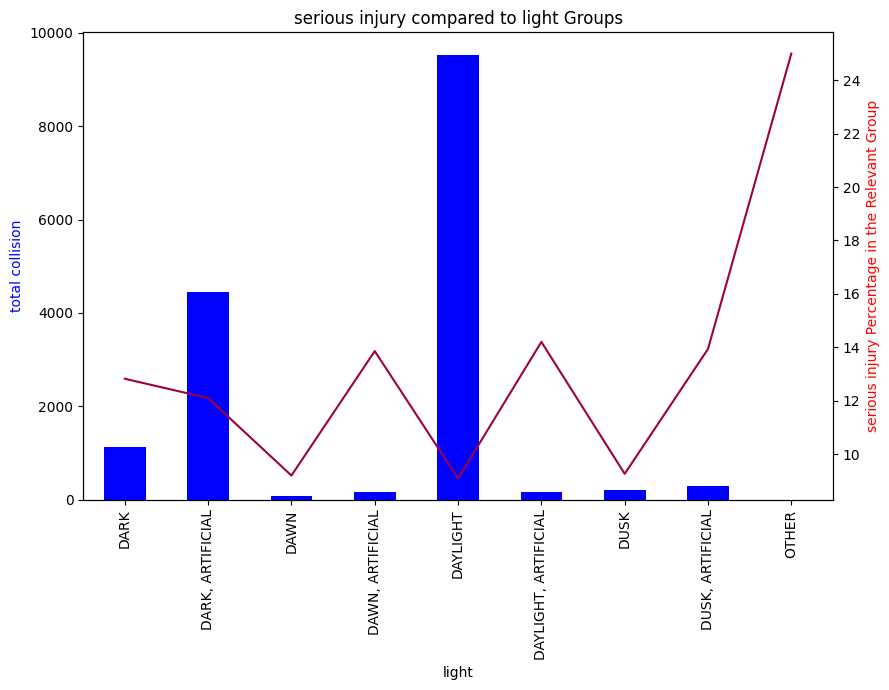

In [125]:
graph_df(x='light')

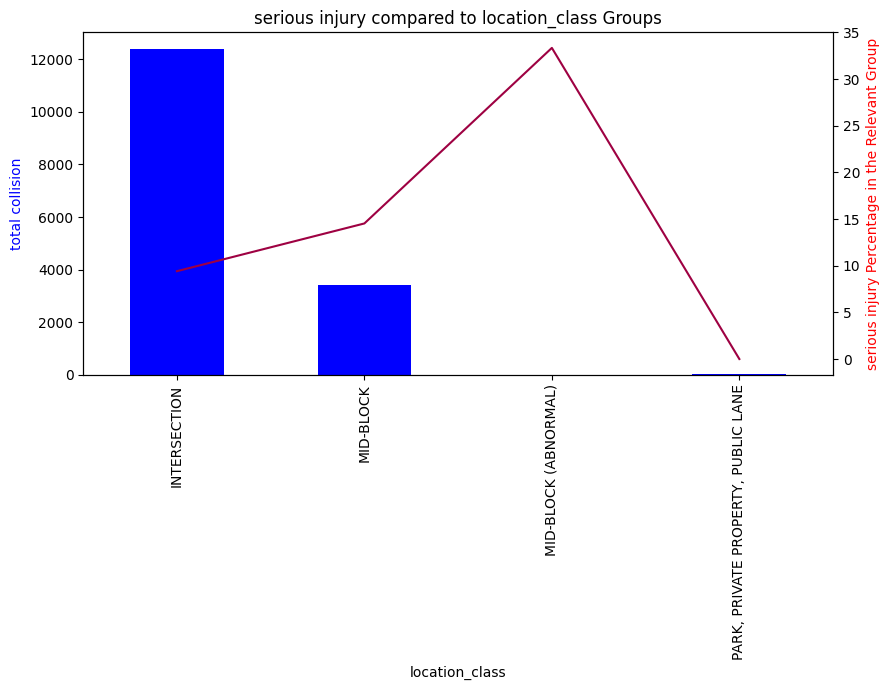

In [126]:
graph_df(x='location_class')

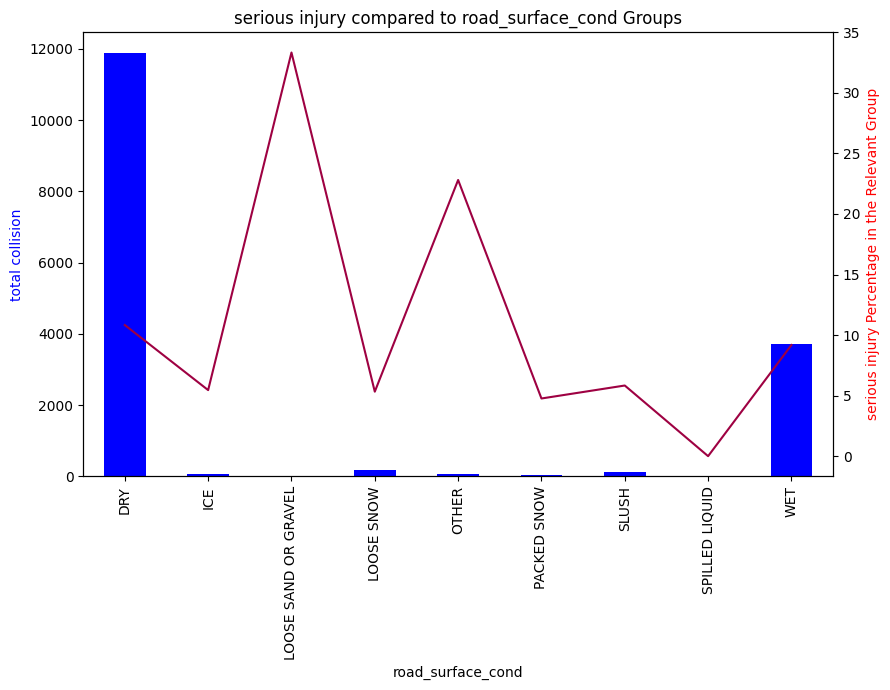

In [127]:
graph_df(x='road_surface_cond')

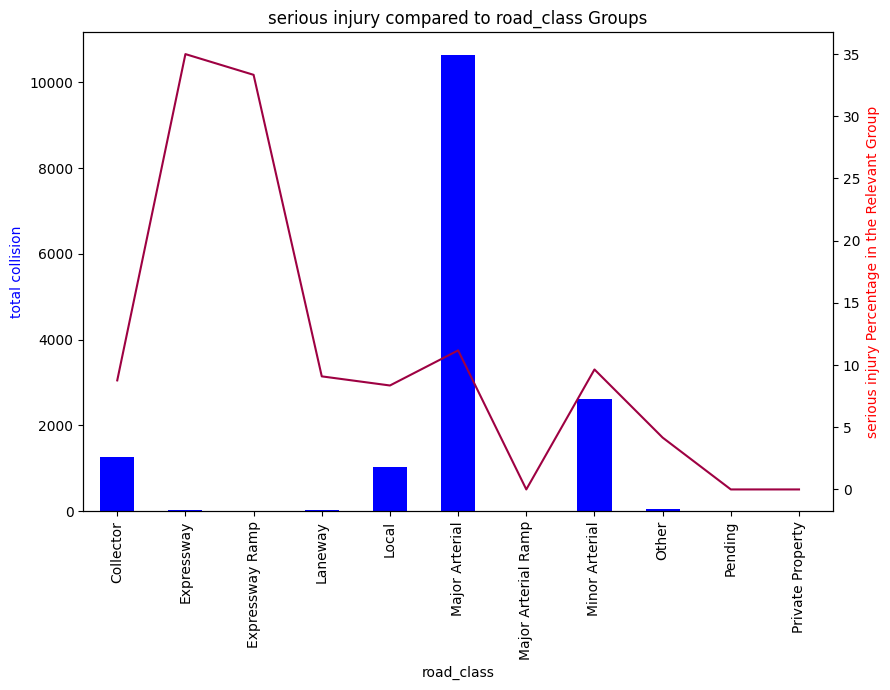

In [128]:
graph_df(x='road_class')

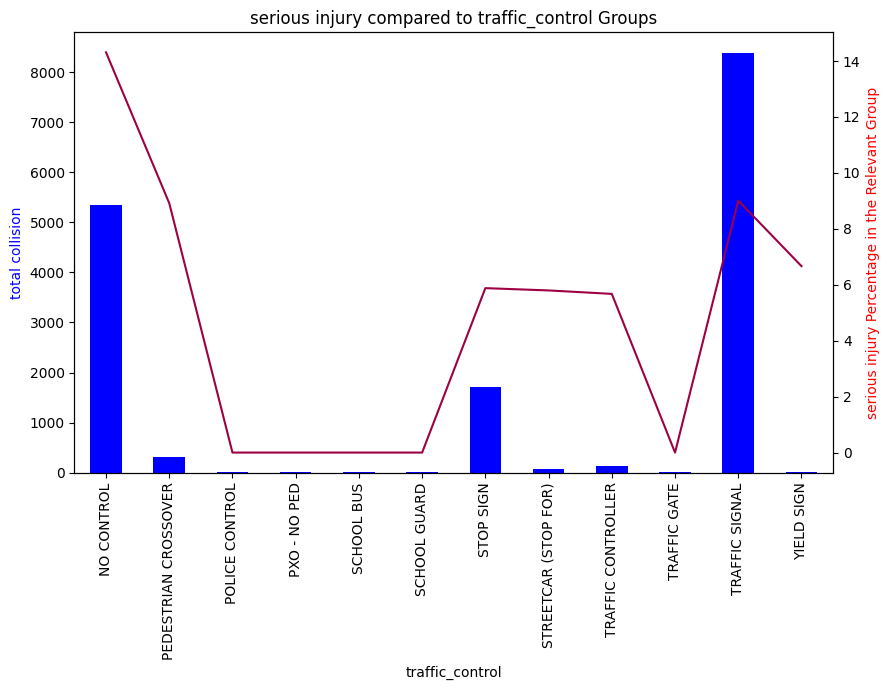

In [129]:
graph_df(x='traffic_control')

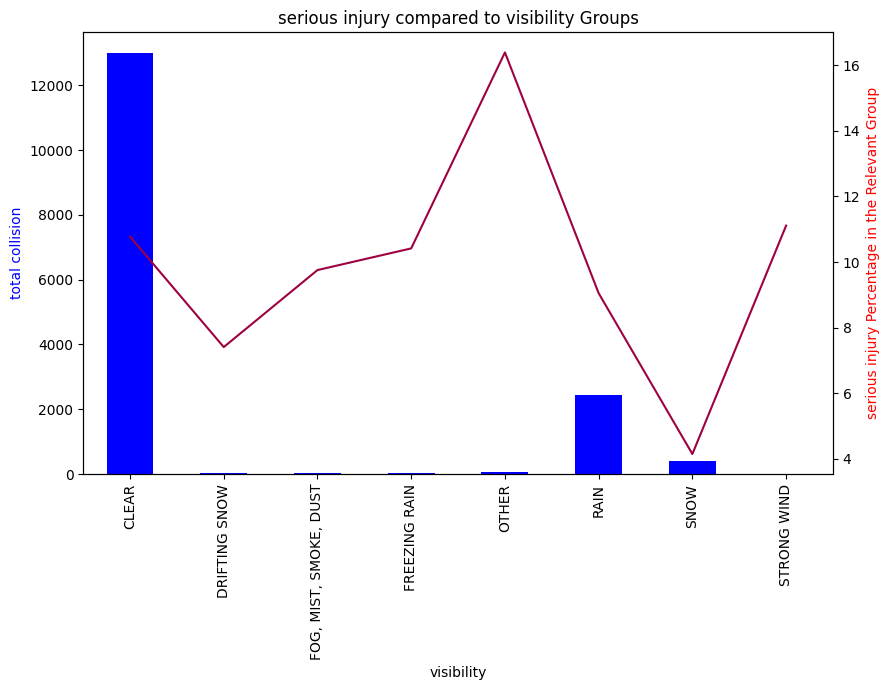

In [130]:
graph_df(x='visibility')

In [131]:
df2.columns

Index(['actual_speed', 'driver_condition', 'impact_location',
       'involved_injury_class', 'involved_age', 'involved_class', 'manoeuver',
       'pedestrian_action', 'pedestrian_condition',
       'pedestrian_collision_type', 'posted_speed', 'vehicle_class', 'accdate',
       'district', 'latitude', 'longitude', 'impact_type', 'light',
       'location_class', 'road_surface_cond', 'road_class', 'traffic_control',
       'visibility', 'month'],
      dtype='object')

### world map scatter plot
chand nemoone moghtasat geo ghalad vared shodan 

In [132]:
import plotly.express as px

In [133]:
fig = px.scatter_geo(df2,lat='latitude',lon='longitude',color='involved_injury_class')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## ML predictive model

### Preprocessing

In [134]:
dataset

,actual_speed,driver_condition,impact_location,involved_injury_class,involved_age,involved_class,manoeuver,pedestrian_action,pedestrian_condition,pedestrian_collision_type,...,district,latitude,longitude,impact_type,light,location_class,road_surface_cond,road_class,traffic_control,visibility
collision_no,,,,,,,,,,,,,,,,,,,,,
1406823,NaN,NaN,NaN,0,43.0,PEDESTRIAN,NaN,CROSSING WITH RIGHT OF WAY,NORMAL,VEHICLE TURNS LEFT WHILE PED CROSSES WITH ROW ...,...,North York,43.769145,-79.376590,PEDESTRIAN COLLISIONS,DAYLIGHT,INTERSECTION,DRY,Major Arterial,TRAFFIC SIGNAL,CLEAR
1406865,NaN,NaN,NaN,0,11.0,PEDESTRIAN,NaN,"CROSSING, NO TRAFFIC CONTROL",INATTENTIVE,PEDESTRIAN INVOLVED IN A COLLISION WITH TRANSI...,...,Scarborough,43.737645,-79.243690,PEDESTRIAN COLLISIONS,DAYLIGHT,INTERSECTION,DRY,Major Arterial,NO CONTROL,CLEAR
1406929,NaN,NaN,NaN,1,66.0,PEDESTRIAN,NaN,"CROSSING, NO TRAFFIC CONTROL",INATTENTIVE,PEDESTRIAN HIT AT MID-BLOCK,...,North York,43.728445,-79.418090,PEDESTRIAN COLLISIONS,DAYLIGHT,MID-BLOCK,DRY,Major Arterial,NO CONTROL,CLEAR
1406992,NaN,NaN,NaN,0,52.0,PEDESTRIAN,NaN,"CROSSING, NO TRAFFIC CONTROL",UNKNOWN,VEHICLE IS GOING STRAIGHT THRU INTER.WHILE PED...,...,Toronto and East York,43.675045,-79.320190,PEDESTRIAN COLLISIONS,"DARK, ARTIFICIAL",INTERSECTION,WET,Minor Arterial,NO CONTROL,RAIN
1407011,NaN,NaN,NaN,1,19.0,PEDESTRIAN,NaN,RUNNING ONTO ROADWAY,INATTENTIVE,PEDESTRIAN INVOLVED IN A COLLISION WITH TRANSI...,...,Toronto and East York,43.687645,-79.396390,PEDESTRIAN COLLISIONS,DAYLIGHT,MID-BLOCK,DRY,Major Arterial,NO CONTROL,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910494,NaN,NaN,THRU LANE,0,51.0,PEDESTRIAN,NaN,OTHER,OTHER,NaN,...,NaN,43.638835,-79.445598,PEDESTRIAN COLLISIONS,DAYLIGHT,MID-BLOCK,WET,NaN,NO CONTROL,CLEAR
1910497,NaN,NaN,WITHIN INTERSECTION,0,27.0,PEDESTRIAN,NaN,NaN,NORMAL,NaN,...,North York,43.733375,-79.452839,PEDESTRIAN COLLISIONS,"DARK, ARTIFICIAL",INTERSECTION,DRY,Major Arterial,TRAFFIC SIGNAL,CLEAR
1910502,NaN,NaN,WITHIN INTERSECTION,0,41.0,PEDESTRIAN,NaN,NaN,NORMAL,NaN,...,NaN,0.000045,0.000210,PEDESTRIAN COLLISIONS,"DARK, ARTIFICIAL",INTERSECTION,DRY,NaN,TRAFFIC SIGNAL,CLEAR


In [135]:
df3=dataset.copy()

In [136]:
df3.nunique()

actual_speed                    36
driver_condition                 3
impact_location                 13
involved_injury_class            2
involved_age                   100
involved_class                   2
manoeuver                       12
pedestrian_action               15
pedestrian_condition            10
pedestrian_collision_type       16
posted_speed                    12
vehicle_class                   17
accdate                       3446
district                         5
latitude                     10207
longitude                    10382
impact_type                      9
light                            9
location_class                   4
road_surface_cond                9
road_class                      11
traffic_control                 12
visibility                       8
dtype: int64

In [137]:
df3=df3.drop(['involved_class'] , axis=1)

In [138]:

df3['month'] = pd.DatetimeIndex(df3['accdate']).month
df3=df3.drop(['accdate'] , axis=1)
df3.columns

Index(['actual_speed', 'driver_condition', 'impact_location',
       'involved_injury_class', 'involved_age', 'manoeuver',
       'pedestrian_action', 'pedestrian_condition',
       'pedestrian_collision_type', 'posted_speed', 'vehicle_class',
       'district', 'latitude', 'longitude', 'impact_type', 'light',
       'location_class', 'road_surface_cond', 'road_class', 'traffic_control',
       'visibility', 'month'],
      dtype='object')

In [142]:
X=df3.drop(['involved_injury_class'],axis=1)
y=df3['involved_injury_class']
print(X.shape , y.shape)

(16050, 21) (16050,)


#### encode categorical features 

In [143]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder=OneHotEncoder(sparse=False,handle_unknown='infrequent_if_exist')

In [144]:
cat= X.select_dtypes(include='object').columns
num= X.select_dtypes(include=['float','int']).columns
print(cat)
print(num)
print(len(cat)+len(num))
# nam_col=list(num)+list(cat)

Index(['driver_condition', 'impact_location', 'manoeuver', 'pedestrian_action',
       'pedestrian_condition', 'pedestrian_collision_type', 'vehicle_class',
       'district', 'impact_type', 'light', 'location_class',
       'road_surface_cond', 'road_class', 'traffic_control', 'visibility'],
      dtype='object')
Index(['actual_speed', 'involved_age', 'posted_speed', 'latitude', 'longitude',
       'month'],
      dtype='object')
21


In [145]:
X.shape

(16050, 21)

In [146]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
fill_nan=KNNImputer(n_neighbors=10)

In [147]:

cat_transformer = Pipeline(
    steps=[  ('encode' , encoder),("fillna", fill_nan)]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", fill_nan, num),
        ("cat", cat_transformer, cat),
    ]
)


### Train test split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train , X_test , y_train , y_test =train_test_split(X, y,test_size=0.2 , random_state=2020 , shuffle=True)
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(12840, 21) (12840,) (3210, 21) (3210,)


### determine important feature with statistical metrics

In [150]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif , mutual_info_classif 


c:\Users\k_nejads\Documents\GitHub\Predict-Pedestrian-Collisions-Severity\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



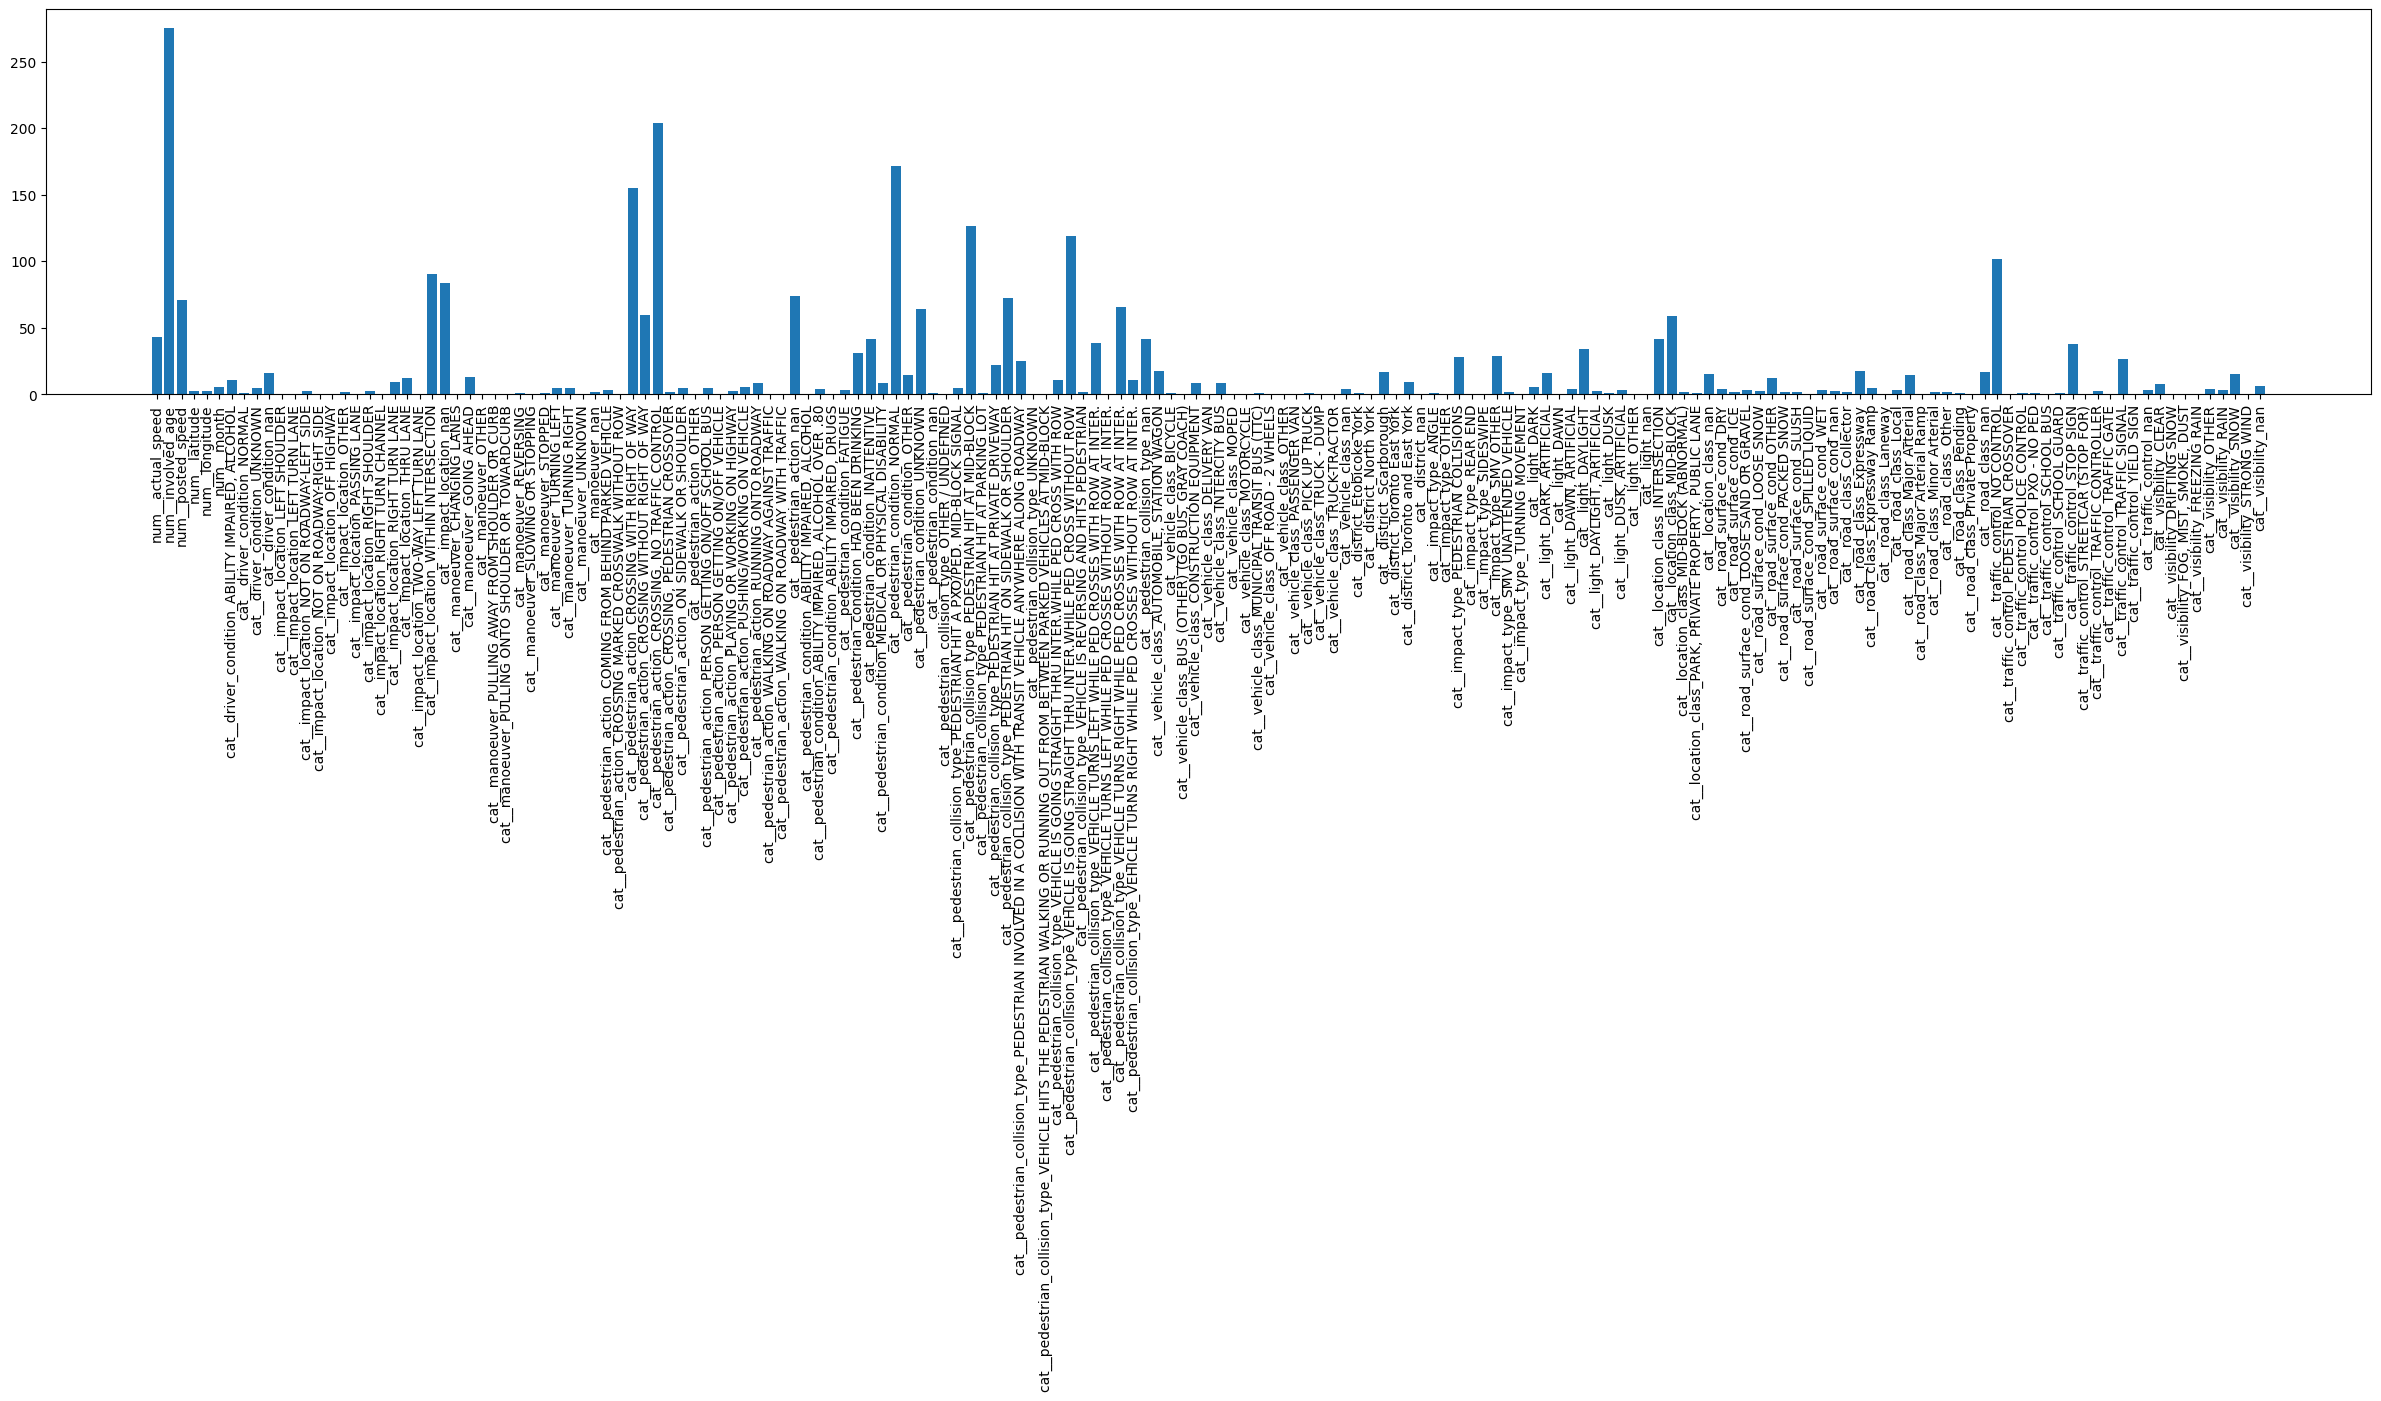

Feature 0: 43.010994
Feature 1: 275.677591
Feature 2: 70.850551
Feature 3: 2.706659
Feature 4: 2.306189
Feature 5: 5.388010
Feature 6: 10.464086
Feature 7: 0.799059
Feature 8: 4.579173
Feature 9: 15.934112
Feature 10: 0.015851
Feature 11: 0.227703
Feature 12: 2.329005
Feature 13: 0.639549
Feature 14: 0.133653
Feature 15: 1.898296
Feature 16: 0.006824
Feature 17: 2.722239
Feature 18: 0.007409
Feature 19: 9.242959
Feature 20: 12.209990
Feature 21: 0.555912
Feature 22: 90.218331
Feature 23: 83.623203
Feature 24: 0.228204
Feature 25: 13.305641
Feature 26: 0.000010
Feature 27: 0.342335
Feature 28: 0.114092
Feature 29: 0.913290
Feature 30: 0.269548
Feature 31: 0.684849
Feature 32: 5.038846
Feature 33: 4.923898
Feature 34: 0.276270
Feature 35: 1.567895
Feature 36: 3.049788
Feature 37: 0.176388
Feature 38: 155.131268
Feature 39: 59.396950
Feature 40: 204.119594
Feature 41: 1.742243
Feature 42: 4.864450
Feature 43: 0.312701
Feature 44: 4.819721
Feature 45: 0.503983
Feature 46: 2.611548
Feature 

In [151]:
fs = SelectKBest(score_func=f_classif, k='all')
fs_pip=Pipeline([('pre',preprocessor) , ('fs',fs)])
fs_pip.fit(X_train, y_train)
plt.figure(figsize=(30,5))
plt.bar(fs_pip['pre'].get_feature_names_out().tolist(), fs_pip[-1].scores_)
plt.xticks(rotation=90)
plt.show()
for i in range(len(fs_pip[-1].scores_)):
    print('Feature %d: %f' % (i, fs_pip[-1].scores_[i]))
    

c:\Users\k_nejads\Documents\GitHub\Predict-Pedestrian-Collisions-Severity\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



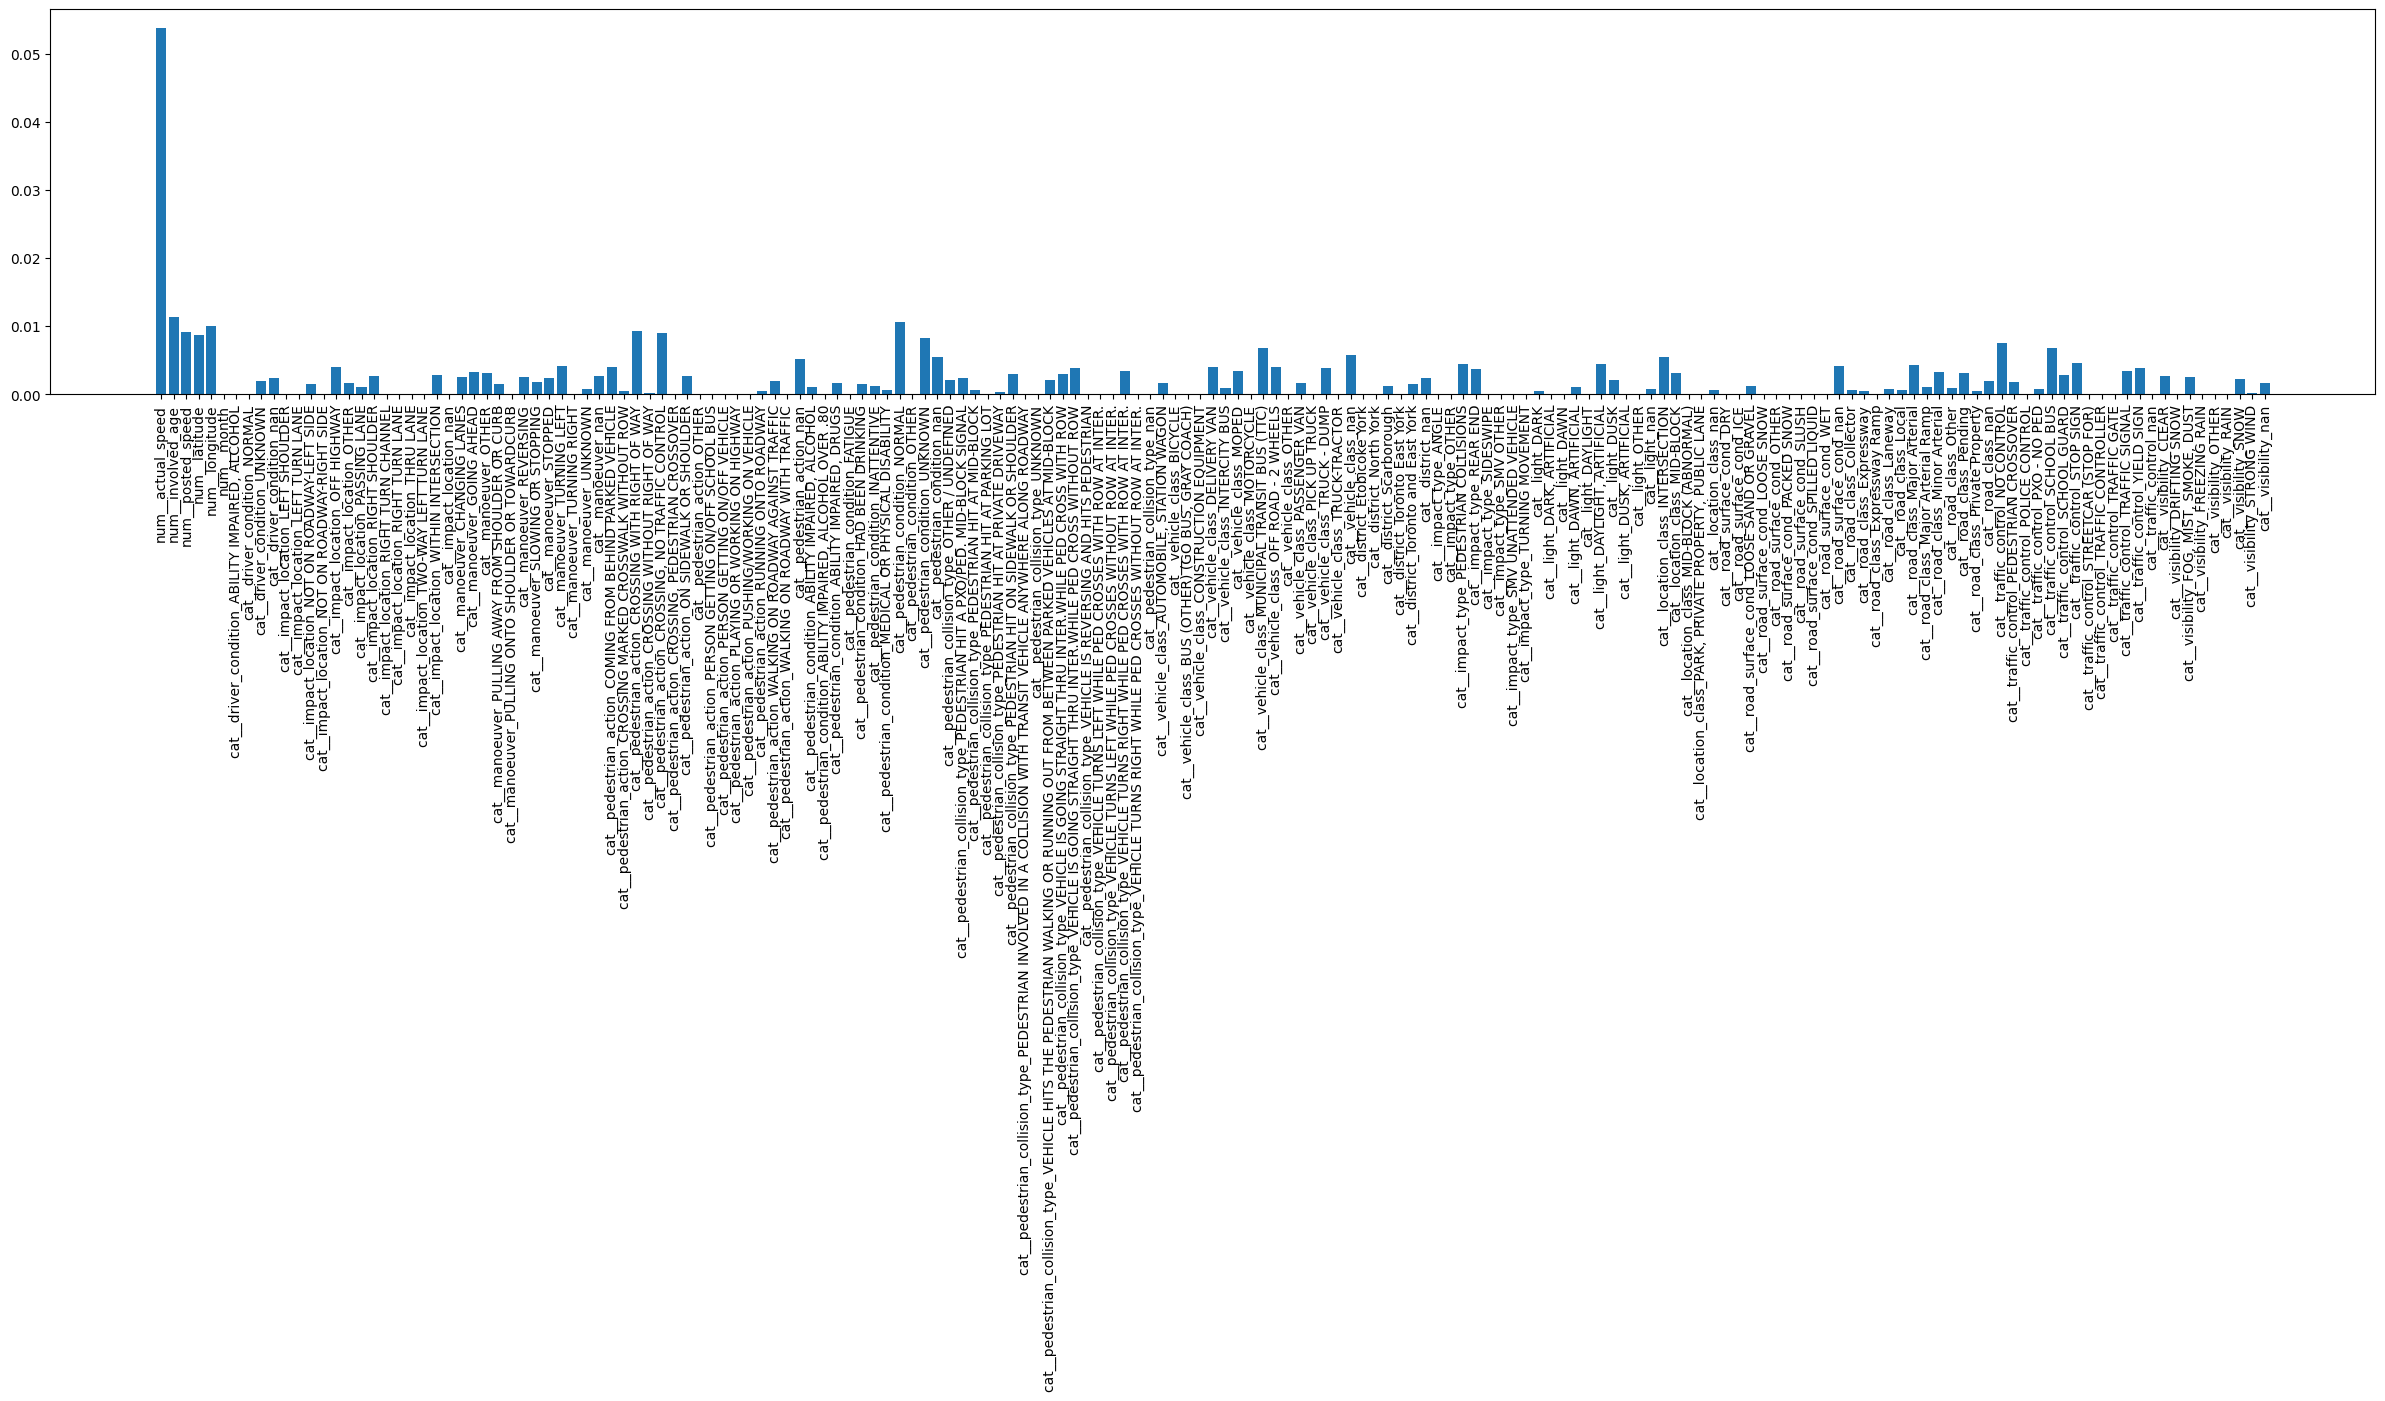

Feature 0: 0.053854
Feature 1: 0.011329
Feature 2: 0.009231
Feature 3: 0.008712
Feature 4: 0.009990
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.000074
Feature 8: 0.001928
Feature 9: 0.002453
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.001597
Feature 13: 0.000000
Feature 14: 0.003981
Feature 15: 0.001726
Feature 16: 0.001072
Feature 17: 0.002673
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.000000
Feature 22: 0.002851
Feature 23: 0.000000
Feature 24: 0.002614
Feature 25: 0.003357
Feature 26: 0.003196
Feature 27: 0.001579
Feature 28: 0.000000
Feature 29: 0.002573
Feature 30: 0.001766
Feature 31: 0.002340
Feature 32: 0.004214
Feature 33: 0.000000
Feature 34: 0.000829
Feature 35: 0.002699
Feature 36: 0.004012
Feature 37: 0.000479
Feature 38: 0.009280
Feature 39: 0.000225
Feature 40: 0.009003
Feature 41: 0.000000
Feature 42: 0.002717
Feature 43: 0.000000
Feature 44: 0.000000
Feature 45: 0.000000
Feature 46: 0.000000
Feature 47: 0.000000
Fe

In [152]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs_pip=Pipeline([('pre',preprocessor) , ('fs',fs)])
fs_pip.fit(X_train, y_train)
plt.figure(figsize=(30,5))
plt.bar(fs_pip['pre'].get_feature_names_out().tolist(), fs_pip[-1].scores_)
plt.xticks(rotation=90)
plt.show()
for i in range(len(fs_pip[-1].scores_)):
    print('Feature %d: %f' % (i, fs_pip[-1].scores_[i]))
    



#### Apply ML models

In [153]:
from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score , roc_auc_score, confusion_matrix

In [154]:
pip install eli5


     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     --- --------------------------------- 20.5/216.2 kB 162.5 kB/s eta 0:00:02
     ----- ------------------------------- 30.7/216.2 kB 187.9 kB/s eta 0:00:01
     ---------- -------------------------- 61.4/216.2 kB 297.7 kB/s eta 0:00:01
     -------------------------------- --- 194.6/216.2 kB 841.6 kB/s eta 0:00:01
     ------------------------------------ 216.2/216.2 kB 824.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   -------------

In [155]:
# from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance



In [161]:
def fitandeval(model):
  pip=Pipeline([('pre',preprocessor),('model',model)])
  pip.fit(X_train , y_train)
  y_pred=pip.predict(X_test)
  acc=accuracy_score(y_test , y_pred)
  recall=recall_score(y_test,y_pred)
  fscore=f1_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  roc_auc=roc_auc_score(y_test,y_pred)
  cf_matrix= confusion_matrix(y_test, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  print('acc ='+str(acc),end='\n')
  print('recall ='+str(recall),end='\n')
  print('fscore ='+str(fscore),end='\n')
  print('precision ='+str(precision),end='\n')
  print('roc auc ='+str(roc_auc),end='\n')
  perm=permutation_importance(pip,X_test , y_test, n_repeats=3,random_state=2020)
#   eli5.show_weights(perm)
                
                
  return acc ,  precision ,recall , fscore ,roc_auc, perm

#### Gradient Boosting

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

c:\Users\k_nejads\Documents\GitHub\Predict-Pedestrian-Collisions-Severity\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



acc =0.908411214953271
recall =0.396011396011396
fscore =0.486013986013986
precision =0.6289592760180995
roc auc =0.6836650194467614


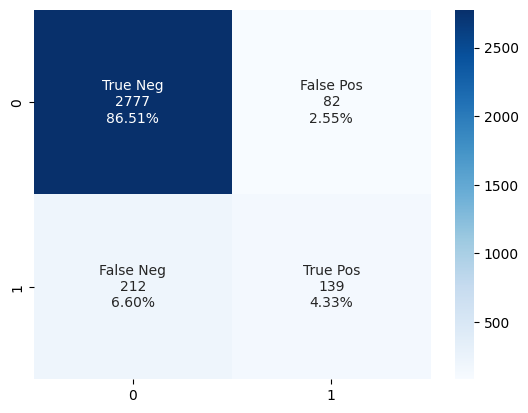

In [163]:
GB= GradientBoostingClassifier(max_depth=7,n_estimators=225,learning_rate=0.6,random_state=123)
acc_GB,precision_GB,recall_GB,f1_GB,roc_auc_GB ,perm_GB=fitandeval(GB )

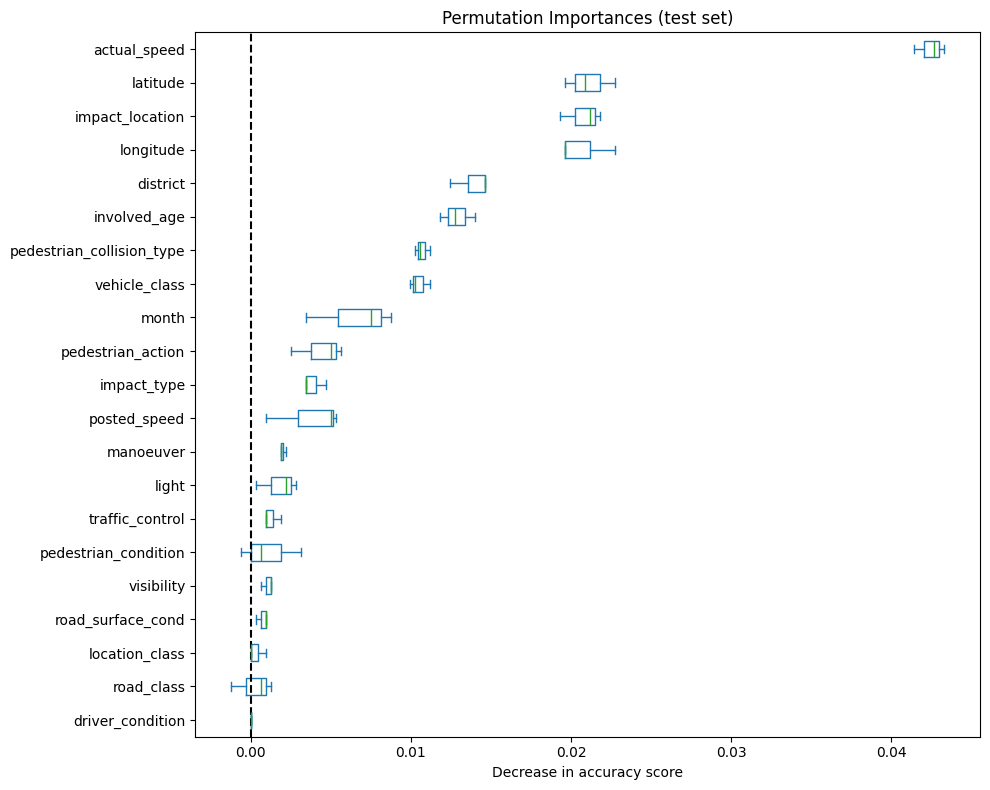

In [164]:


sorted_importances_idx = perm_GB.importances_mean.argsort()
importances = pd.DataFrame(
    perm_GB.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10 ,figsize=(10, 8))

ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Decision Tree

c:\Users\k_nejads\Documents\GitHub\Predict-Pedestrian-Collisions-Severity\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



acc =0.721183800623053
recall =0.6324786324786325
fscore =0.33159073935772965
precision =0.22469635627530365
roc auc =0.6822763921399808


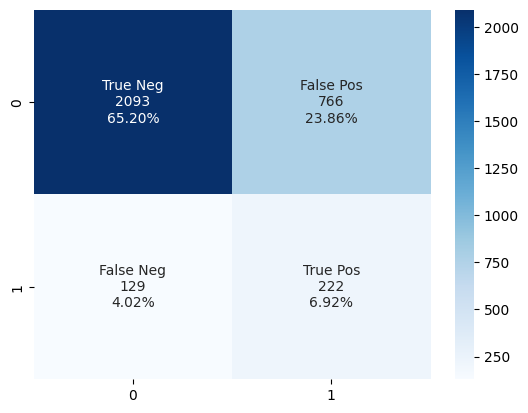

In [166]:
DT = DecisionTreeClassifier(max_depth=8,min_samples_split=2,criterion='gini',class_weight='balanced')


acc_DT,precision_DT,recall_DT,f1_DT,roc_auc_DT ,perm_DT=fitandeval(DT)

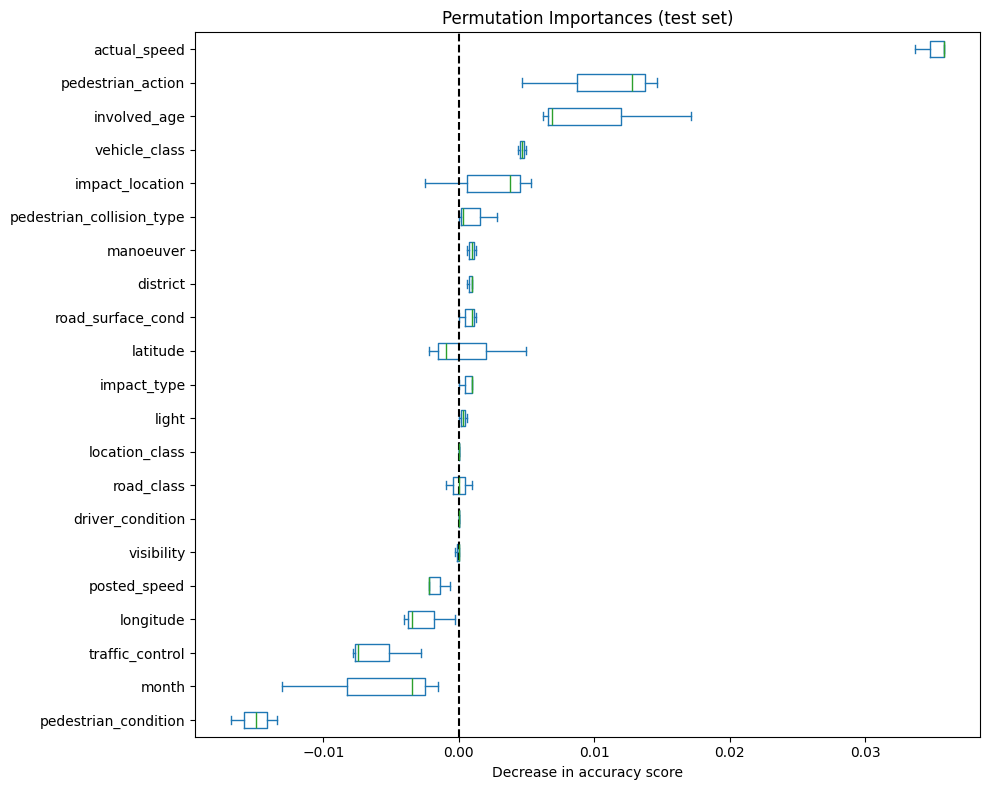

In [167]:
sorted_importances_idx = perm_DT.importances_mean.argsort()
importances = pd.DataFrame(
    perm_DT.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10 ,figsize=(10, 8))

ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


#### SVM

c:\Users\k_nejads\Documents\GitHub\Predict-Pedestrian-Collisions-Severity\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



acc =0.7149532710280374
recall =0.6410256410256411
fscore =0.32967032967032966
precision =0.22189349112426035
roc auc =0.6825275109640272


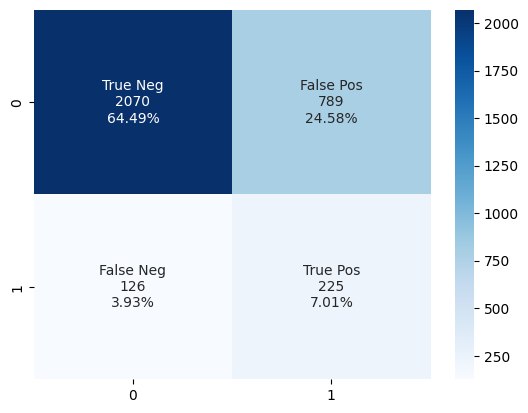

In [168]:
SVM = SVC(kernel='poly',C=5,gamma='auto',class_weight='balanced')


acc_SVM,precision_SVM,recall_SVM,f1_SVM,roc_auc_SVM ,perm_SVM=fitandeval(SVM)

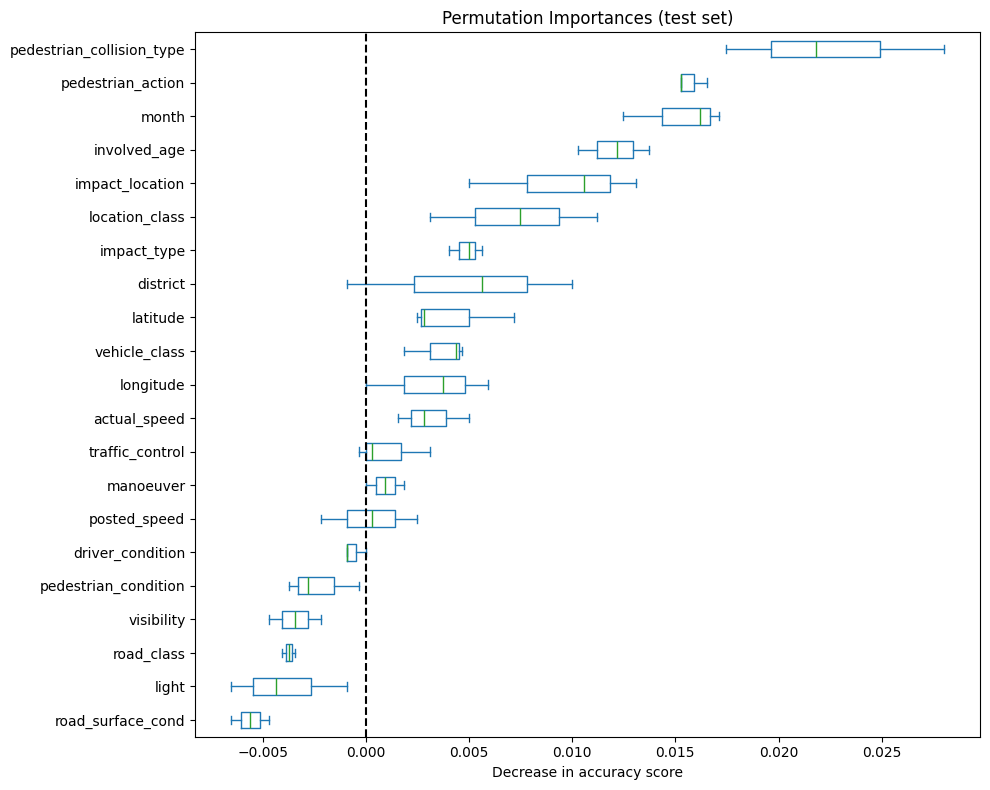

In [169]:
sorted_importances_idx = perm_SVM.importances_mean.argsort()
importances = pd.DataFrame(
    perm_SVM.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10 ,figsize=(10, 8))

ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### KNN

c:\Users\k_nejads\Documents\GitHub\Predict-Pedestrian-Collisions-Severity\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



acc =0.9046728971962616
recall =0.20797720797720798
fscore =0.3230088495575221
precision =0.7227722772277227
roc auc =0.5990917869196988


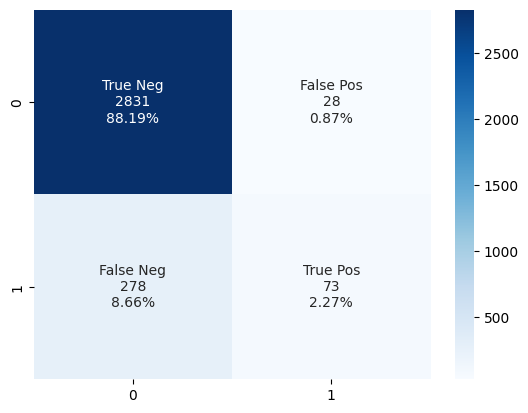

In [170]:
KNN = KNeighborsClassifier(n_neighbors=6,weights='distance')

acc_KNN,precision_KNN,recall_KNN,f1_KNN,roc_auc_KNN , perm_KNN=fitandeval(KNN)

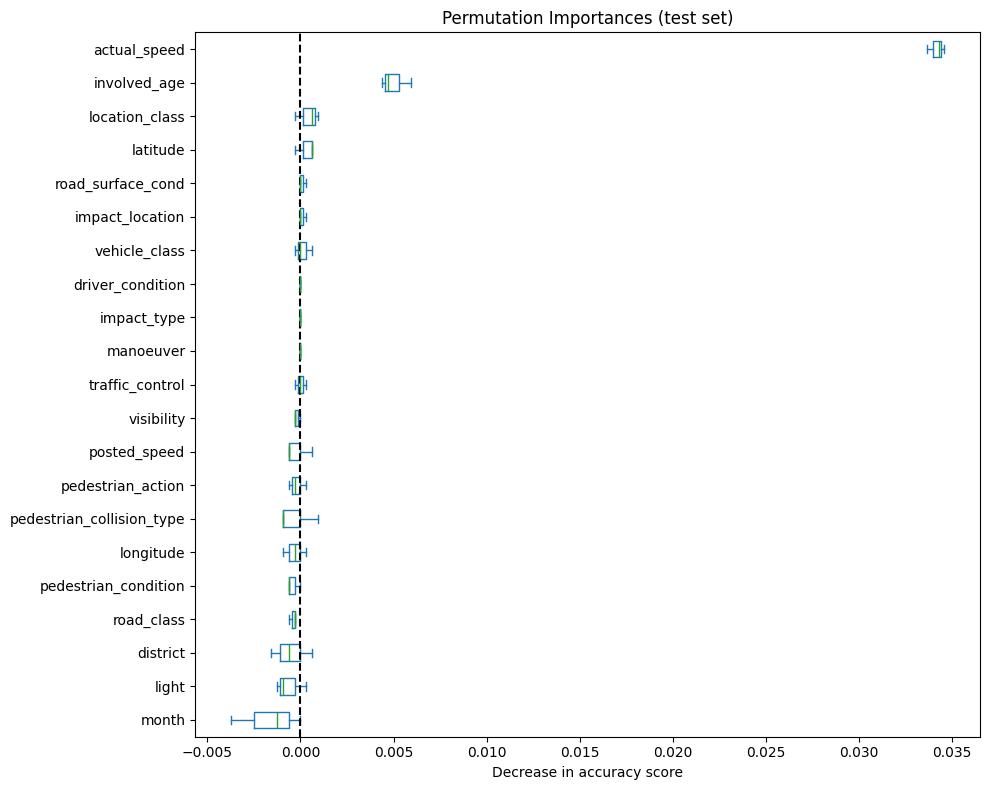

In [171]:
sorted_importances_idx = perm_KNN.importances_mean.argsort()
importances = pd.DataFrame(
    perm_KNN.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10 ,figsize=(10, 8))

ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()